# Installation and Import of packages, mount the drive

In [2]:
# Import the packages 
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table
import dataframe_image as dfi

/Users/daai6ga1hou2/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# A scheme Beyond PPM

We temporarily call the scheme as Jonas. \\
We have 4 photons
<br>
14 timeslots
<br>
1 symbol created by 14 timeslots

A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\

A2. The number of possible symbols, m, will be m=k \\

A3. The number of bits (the information content per symbol) will be b=log2(m) \\


## Sequence to design the length of time slot / time bin
We can generate the desired number of sequence we want from the below code.

A010672		A B_2 sequence: a(n) = least value such that sequence increases and pairwise sums of distinct elements are all distinct. \\
Author: 	Dan Hoey

1. https://oeis.org/A010672
2. https://oeis.org/A011185
3. https://oeis.org/A010672

The below function generates a list of 100 sequences.

In [3]:
from itertools import islice

def agen(): # generator of terms

    aset, sset, k = set(), set(), 0

    while True:

        k += 1

        while any(k+an in sset for an in aset): k += 1

        yield k; sset.update(k+an for an in aset); aset.add(k)
        
a = list(islice(agen(), 100))
b = list(map(lambda v: v-1, a))
print(b)

[0, 1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211, 257, 315, 373, 412, 475, 530, 545, 607, 716, 797, 861, 964, 1059, 1160, 1306, 1385, 1434, 1555, 1721, 1833, 1933, 2057, 2260, 2496, 2698, 2873, 3060, 3196, 3331, 3628, 3711, 3867, 4139, 4446, 4639, 5021, 5064, 5322, 5613, 6003, 6273, 6493, 6641, 6979, 7275, 7587, 8017, 8373, 9071, 9167, 9760, 10105, 10489, 11109, 11374, 11516, 12101, 12330, 12867, 13426, 13923, 14535, 14911, 15469, 15904, 16136, 16900, 17041, 17822, 19421, 19933, 20288, 20996, 21491, 22065, 22612, 22659, 23724, 24399, 24969, 25360, 26071, 26680, 27601]


In [4]:
len(b)

100

## The Number of Time Bin (Time Slot)
Let us consider the following sequence:
[0, 1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127] as an example

Since we should have at least 1 photon in a time slot, we drop out the 1st term and start with the value 1.

The length of the nth time bin is the sum of the first nth sequence. 

In [5]:
l = [1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211, 257, 315, 373, 412, 475, 530, 545, 607, 716, 797, 861, 964, 1059, 1160, 1306, 1385, 1434] # or l = range(1, 21)
series = [sum(l[:i]) for i in range(1,len(l)+1)]
print (series)


[1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198]


In [6]:
def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]

In [7]:
list_BPPM = []
for n_BPPM in range (1,100):
    computed_value = compute_N(n_BPPM)
    list_BPPM.append(compute_N(n_BPPM))

If we have 4 photons to encode into the superblock. We represent them into a sequence in a list as [1,2,4,7], which is encoded as follow: \\
H H0 H000 V000000, which comprie of 14 time slots.
We can find all the permutation, i.e. the number of ways to order them, which is 4! = 24. It means that we have 24 possible way to represent a symbol in this time bin.

In [8]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 4, 7]) 

lists = []
# Print the obtained permutations 
for i in (perm): 
    #print (i)
    lists.append(i) 

lists

[(1, 2, 4, 7),
 (1, 2, 7, 4),
 (1, 4, 2, 7),
 (1, 4, 7, 2),
 (1, 7, 2, 4),
 (1, 7, 4, 2),
 (2, 1, 4, 7),
 (2, 1, 7, 4),
 (2, 4, 1, 7),
 (2, 4, 7, 1),
 (2, 7, 1, 4),
 (2, 7, 4, 1),
 (4, 1, 2, 7),
 (4, 1, 7, 2),
 (4, 2, 1, 7),
 (4, 2, 7, 1),
 (4, 7, 1, 2),
 (4, 7, 2, 1),
 (7, 1, 2, 4),
 (7, 1, 4, 2),
 (7, 2, 1, 4),
 (7, 2, 4, 1),
 (7, 4, 1, 2),
 (7, 4, 2, 1)]

# Number of ways to order the photons
$$n!$$

In [9]:
def ways(n):
    return math.factorial(n)

# Number of Bits per Symbol
It is the information content per symbol

$$ log_2{n!}$$

In [10]:
def bps(W):
    return math.log2(W)

# Number of Bits per Photon

math.log2(Jonasways) / n

$$ log_2\frac{{n!}}{n}$$


In [11]:
def bpph(b,n):
    return b/n

# Number of Bits per Timeslot

$$ log_2\frac{{n!}}{n} \times \frac{n}{T}$$


In [12]:
def bpt(B, n, T):
    return B*n/T

In [13]:
bpph(bps(24), 4)*4/14

0.3274973214800826

# Putting all the functions together

In [14]:
from matplotlib.ticker import MaxNLocator

Jonasnumber = []
JonasPermutation = []
JonasBPS = []
JonasBPP = []
JonasBPT = []


list_BPPM# series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198]

df_Jonas = pd.DataFrame(columns=['Number of Photon', 
                           'Time Bins',
                           'Permutation',
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,11):
    Jonasways = math.factorial(n)         # A2. The number of possible symbols, m, will be m=k \\
    JonasTimeBin = list_BPPM[n-1]            # A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\
    Jonasbps = math.log2(Jonasways)       # A3. The number of bits (the information content per symbol) will be b=log2(m)   
    Jonasbpp = math.log2(Jonasways) / n
    Jonasbpt = Jonasbpp * n/list_BPPM[n-1]

    # JonasTimeBin_SigFig = "{:.2e}".format(JonasTimeBin)
    # Jonasways_SigFig = "{:.7g}".format(Jonasways)
    # Jonasbps_round = round(Jonasbps, 5)
    # Jonasbpp_round = round(Jonasbpp, 5)
    # Jonasbpt_round = round(Jonasbpt, 5)
    # df_Jonas.loc[len(df_Jonas)+1] = [n, f'{JonasTimeBin}', f'{Jonasways_SigFig}', f'{Jonasbps_round}', f'{Jonasbpp_round}', f'{Jonasbpt_round}'] 
    # df_Jonas.loc[len(df_Jonas)+1] = [n, JonasTimeBin, Jonasways_SigFig, Jonasbps_round, Jonasbpp_round, Jonasbpt_round] 
    df_Jonas.loc[len(df_Jonas)+1] = [n, JonasTimeBin, Jonasways, Jonasbps, Jonasbpp, Jonasbpt]
    
for n in range(11,70):
    Jonasways = math.factorial(n)         # A2. The number of possible symbols, m, will be m=k \\
    JonasTimeBin = list_BPPM[n-1]            # A1. The number of slots n with Jonas method. n=Sum(First k integers in the series) \\
    Jonasbps = math.log2(Jonasways)       # A3. The number of bits (the information content per symbol) will be b=log2(m)   
    Jonasbpp = math.log2(Jonasways) / n
    Jonasbpt = Jonasbpp * n/list_BPPM[n-1]

    # JonasTimeBin_SigFig = "{:.2e}".format(JonasTimeBin)
    # Jonasways_SigFig = "{:.2e}".format(Jonasways)
    # Jonasbps_round = round(Jonasbps, 5)
    # Jonasbpp_round = round(Jonasbpp, 5)
    # Jonasbpt_round = round(Jonasbpt, 5)
    # df_Jonas.loc[len(df_Jonas)] = [n, f'{JonasTimeBin}', f'{Jonasways_SigFig}', f'{Jonasbps_round}', f'{Jonasbpp_round}', f'{Jonasbpt_round}']
    # df_Jonas.loc[len(df_Jonas)+1] = [n, JonasTimeBin, Jonasways_SigFig, Jonasbps_round, Jonasbpp_round, Jonasbpt_round]
    df_Jonas.loc[len(df_Jonas)+1] = [n, JonasTimeBin, Jonasways, Jonasbps, Jonasbpp, Jonasbpt]

In [15]:
df_Jonas # 4th one data is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.0,1.0,1.0,0.000000,0.000000,0.000000
2,2.0,3.0,2.0,1.000000,0.500000,0.333333
3,3.0,7.0,6.0,2.584963,0.861654,0.369280
4,4.0,14.0,24.0,4.584963,1.146241,0.327497
5,5.0,26.0,120.0,6.906891,1.381378,0.265650
...,...,...,...,...,...,...
65,65.0,170540.0,8247650592082470666723170306785496252186258551...,302.017512,4.646423,0.001771
66,66.0,180300.0,5443449390774430640037292402478427526442930643...,308.061906,4.667605,0.001709
67,67.0,190405.0,3647111091818868528824985909660546442716763531...,314.127995,4.688478,0.001650
68,68.0,200894.0,2480035542436830599600990418569171581047399201...,320.215458,4.709051,0.001594


# Plot Graph

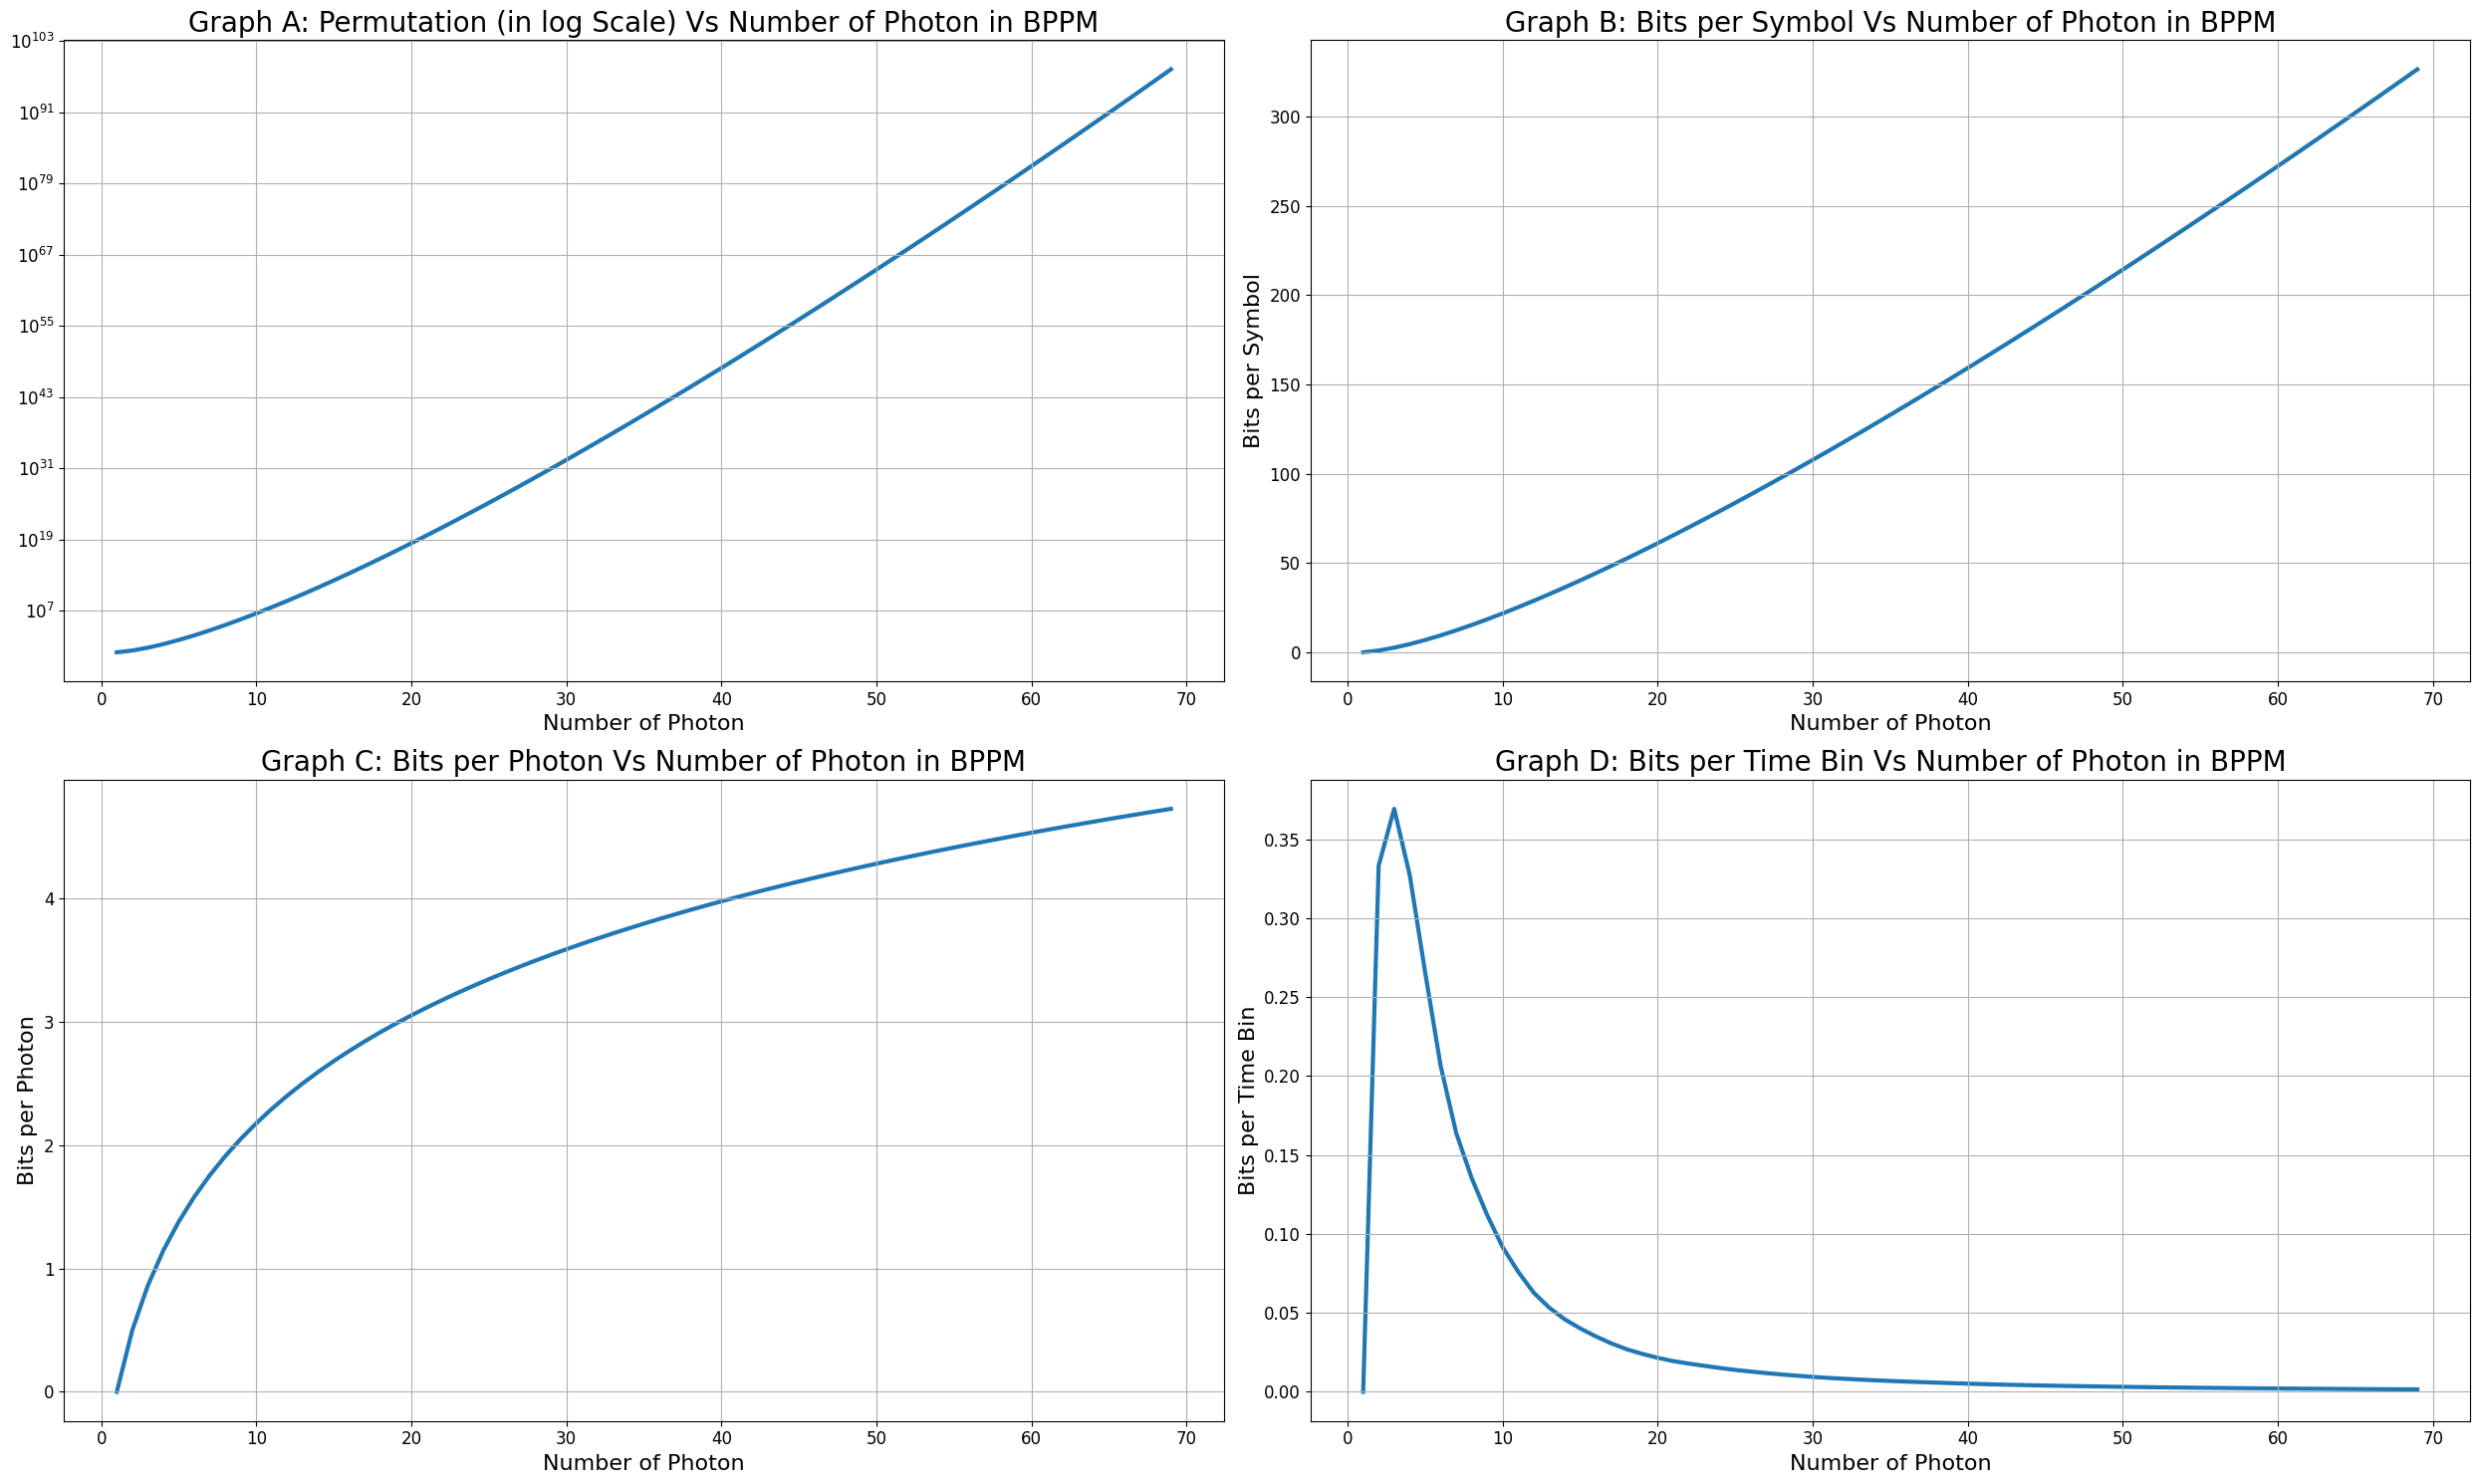

In [16]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Permutation (in log Scale) Vs Number of Photon in BPPM', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
# axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Symbol Vs Number of Photon in BPPM', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
# axis[0, 1].yaxis.set_major_locator(MultipleLocator(10))  # Set to 1 for integer values
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Photon in BPPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Photon in BPPM', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# lt.savefig('BPPM/BPPM_Photon_Plot.png', dpi=450, bbox_inches='tight')

plt.tight_layout()
plt.show()

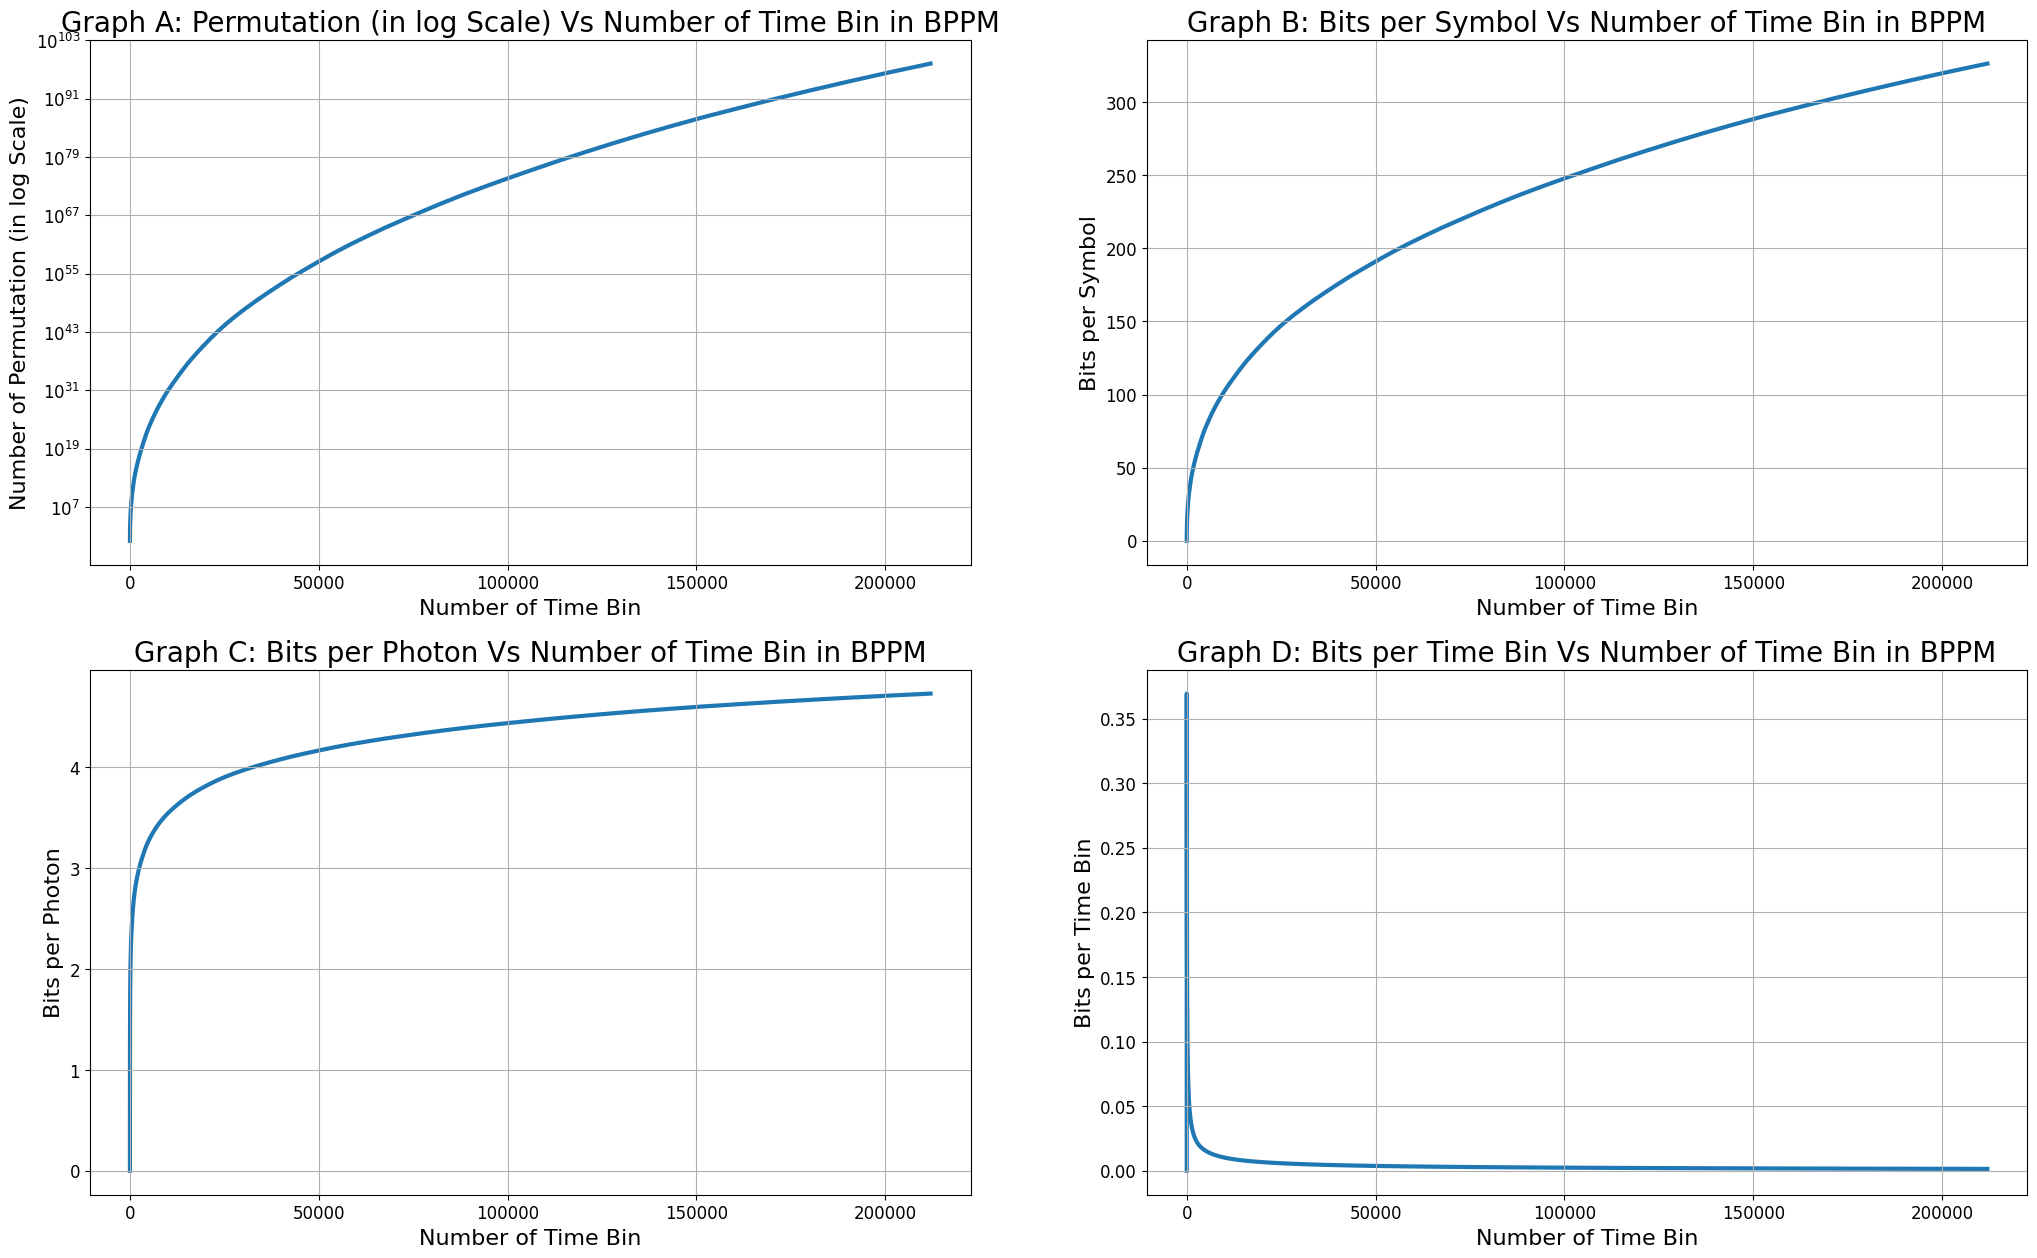

In [17]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Permutation (in log Scale) Vs Number of Time Bin in BPPM', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Symbol Vs Number of Time Bin in BPPM', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Time Bin in BPPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Time Bin in BPPM', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)
figure.set_facecolor("white")
# plt.savefig('BPPM/BPPM_Time_Plot.png', dpi=450, bbox_inches='tight') 
# plt.tight_layout()
plt.show()

# General

The number of symbols m in general method will be the number ow ways k photons can be placed in n bins, i.e. 

$$m= \binom{n}{k}$$

If we have 4 photons, 14 timeslots, then there will be 1,0001 ways to order them by binomial where order does not matter.

The number of bits (the information content per symbol) will be 
$$b=log_2m$$

However, if we consider the repeition are not allowed, then we use 
Permutations = r! x Combinations 

B1. Compare with "general" method using same number of slots, n, and same number of photons, k \\

B2. The number of symbols m in general method will be the number ow ways k photons can be placed in n bins, i.e. m=(n over k) \\

B3. The number of bits (the information content per symbol) will be b=log2(m)


### Combination

In [18]:
def combination(n,r):
  return math.factorial(n) / (math.factorial(n-r)*math.factorial(r))

combination(14,4)

1001.0

In [19]:
Generalnumber_c = []
GeneralPermutation_c = []
GeneralBPS_c = []
GeneralBPP_c = []
GeneralBPT_c = []

list_BPPM # series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198]

df_General_c = pd.DataFrame(columns=['Number of Photon', 
                           'Time Bins',          
                           'Permutation', 
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,50):
    Generalways_c = combination(list_BPPM[n-1],n)
    # Generalways_c = "{:.7g}".format(Generalways_c)# B2. The number of symbols m in general method will be the number ow ways k photons can be placed in n bins, i.e. m=(n over k) \\
    GeneralTimeBin = list_BPPM[n-1]                  # B1. Compare with "general" method using same number of slots, n, and same number of photons, k \\
    Generalbps_c = math.log2(Generalways_c)       # B3. The number of bits (the information content per symbol) will be b=log2(m)
    Generalbpp_c = math.log2(Generalways_c) / n
    Generalbpt_c = Generalbpp_c * n/list_BPPM[n-1]

    GeneralTimeBin_SigFig_c = "{:.2e}".format(GeneralTimeBin)
    Generalways_SigFig_c = "{:.7g}".format(Generalways_c)
    Generalbps_round_c = round(Generalbps_c, 5)
    Generalbpp_round_c = round(Generalbpp_c, 5)
    Generalbpt_round_c = round(Generalbpt_c, 5)

    # df_General_c.loc[len(df_General_c)+1] = [n, GeneralTimeBin, Generalways_SigFig_c, Generalbps_round_c , Generalbpp_round_c, Generalbpt_round_c]
    df_General_c.loc[len(df_General_c)+1] = [n, GeneralTimeBin, Generalways_c, Generalbps_c , Generalbpp_c, Generalbpt_c]

In [20]:
# # The first is zero because, the first item in the time bin is 1, which give the log based 2 to be 0.
# math.log2(combination(1,1))

In [21]:
df_General_c # the 4 data is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.0,1.0,1.000000e+00,0.000000,0.000000,0.000000
2,2.0,3.0,3.000000e+00,1.584963,0.792481,0.528321
3,3.0,7.0,3.500000e+01,5.129283,1.709761,0.732755
4,4.0,14.0,1.001000e+03,9.967226,2.491807,0.711945
5,5.0,26.0,6.578000e+04,16.005361,3.201072,0.615591
6,6.0,46.0,9.366819e+06,23.159128,3.859855,0.503459
7,7.0,75.0,1.984830e+09,30.886368,4.412338,0.411818
8,8.0,113.0,5.117190e+11,38.896561,4.862070,0.344217
9,9.0,165.0,2.000631e+14,47.507449,5.278605,0.287924
10,10.0,238.0,1.326714e+17,56.880635,5.688063,0.238994


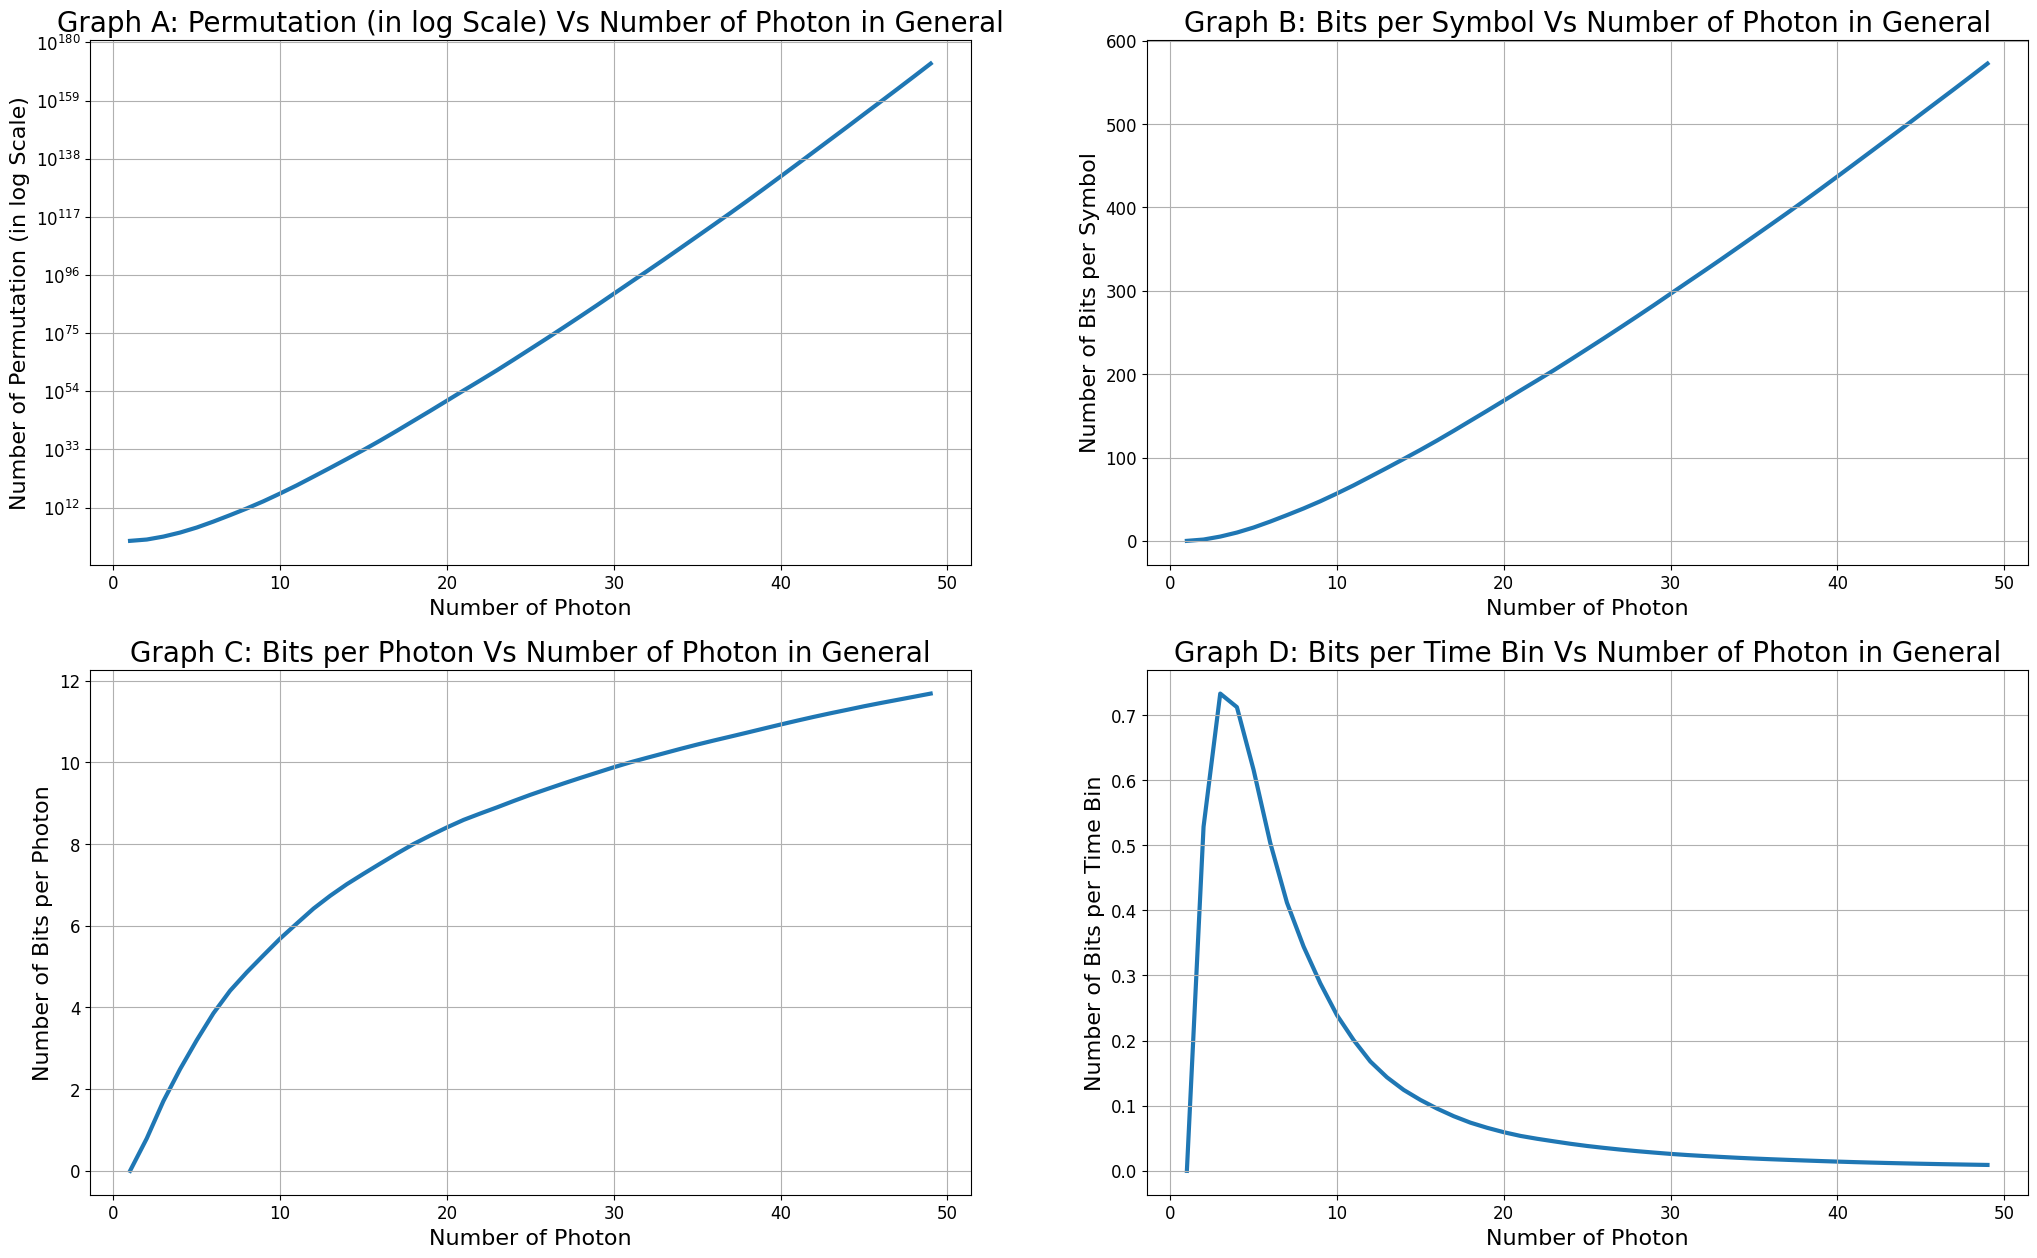

In [22]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Permutation (in log Scale) Vs Number of Photon in General', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Symbol Vs Number of Photon in General', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Photon in General', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Photon in General', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.xticks(x)
# plt.savefig('General/General_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

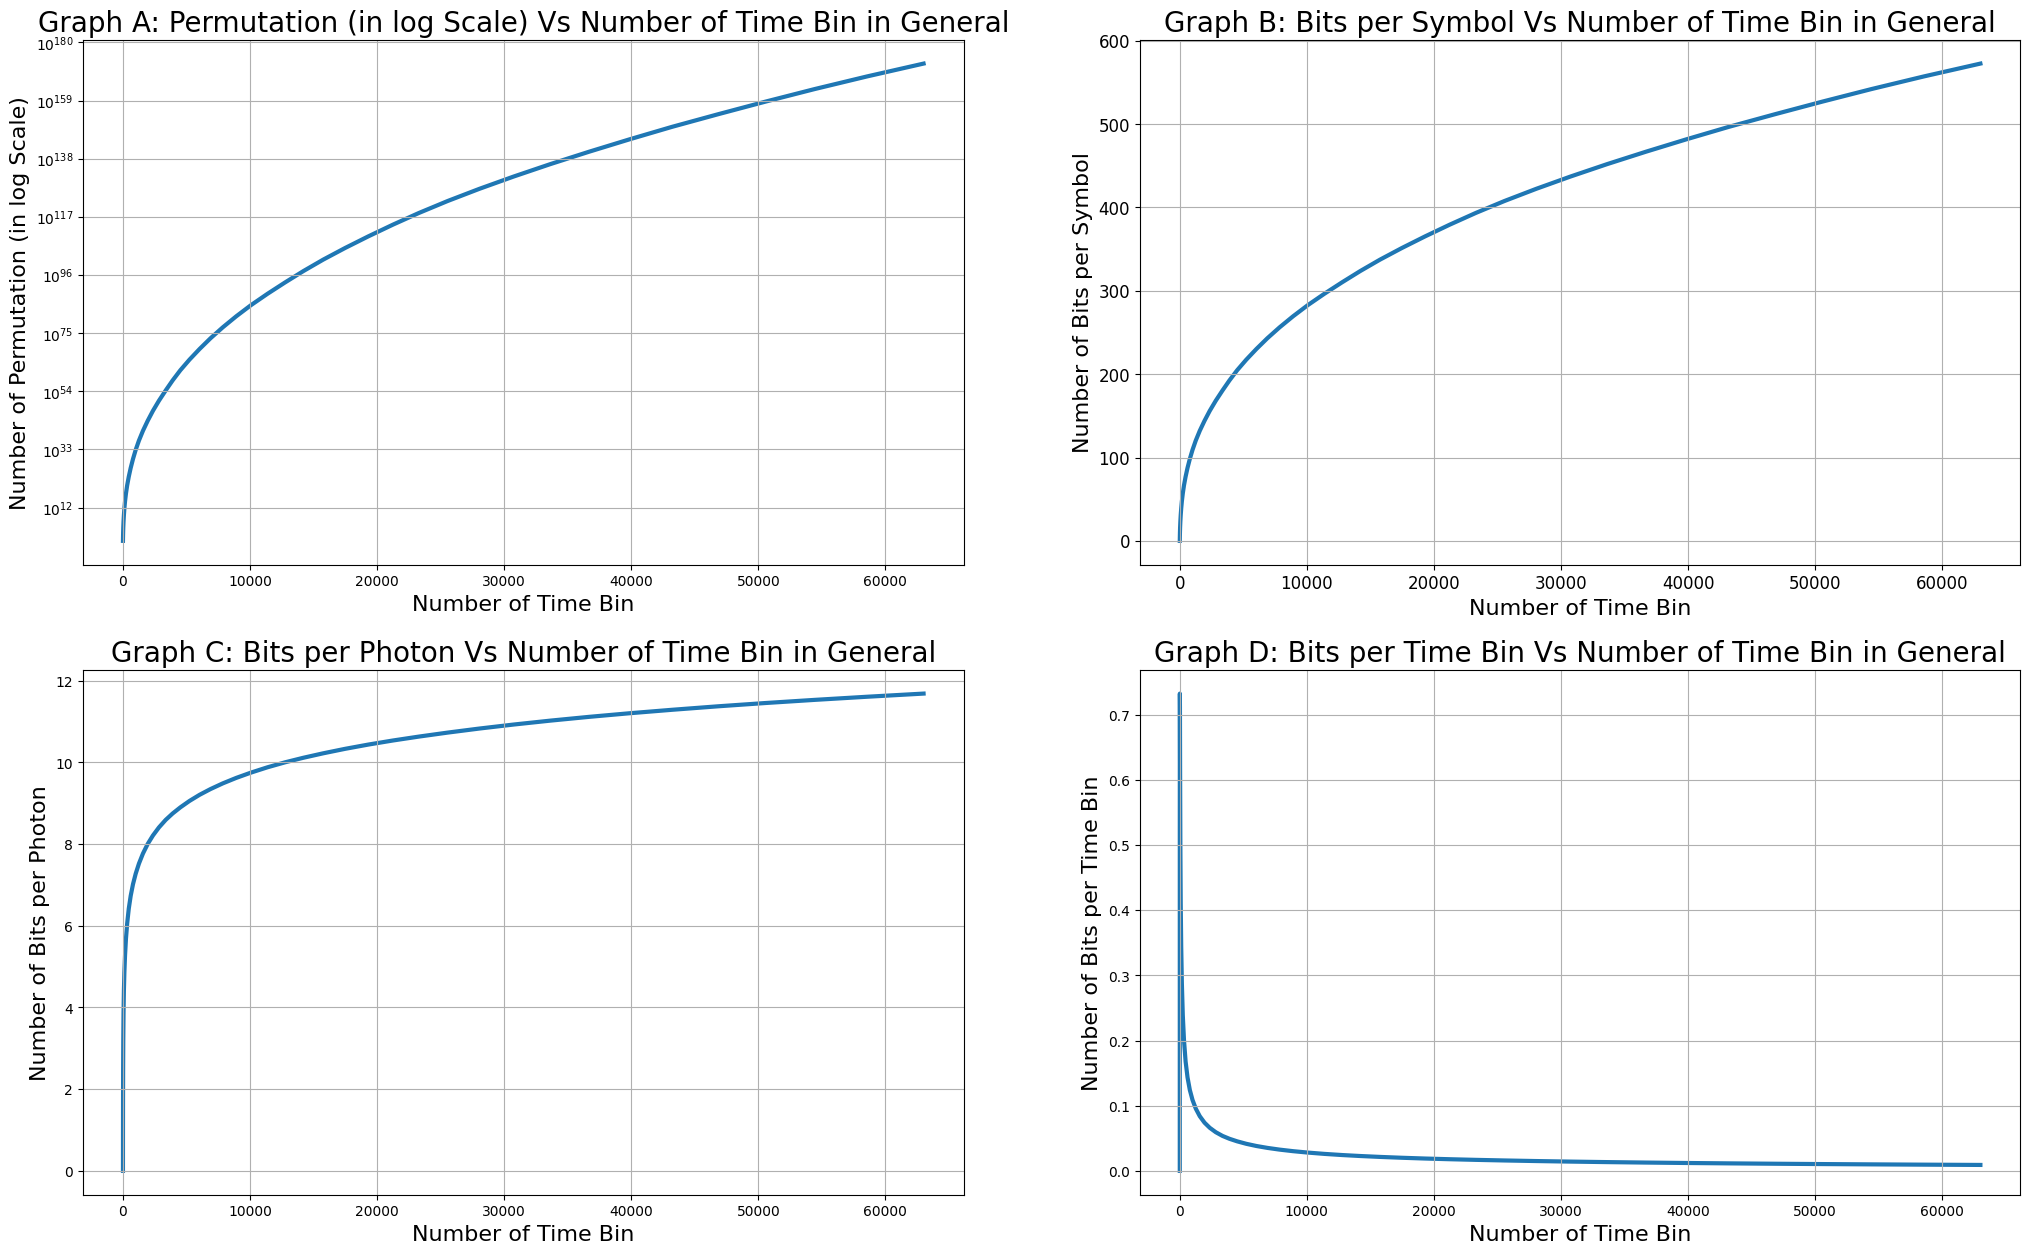

In [23]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Permutation (in log Scale) Vs Number of Time Bin in General', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Symbol Vs Number of Time Bin in General', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Time Bin in General', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Time Bin in General', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.xticks(x)
# plt.savefig('General/General_TIme_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

# PPM

We have 1 photon
<br>
14 timeslots
<br>
14 ways to order them

C1. Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\

C2. The number of symbols m in PPM will be the number ow ways 1 photon can be placed in n bins, i.e. m=n \\

C3. The number of bits (the information content per symbol) will be b=log2(m) \\



In [24]:
PPMnumber = []
PPMPermutation = []
PPMBPS = []
PPMBPP = []
PPMBPT = []

list_BPPM # series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198]

df_PPM = pd.DataFrame(columns=['Number of Photon',
                           'Time Bins',     
                           'Permutation', 
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,70):
    PPMWays = list_BPPM[n-1]
                         # C2 The number of symbols m in PPM will be the number ow ways 1 photon can be placed in n bins, i.e. m=n \\
    PPMTimeBin = list_BPPM[n-1]           # C1 Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\
    PPMbps = math.log2(PPMTimeBin)        # C3 The number of bits (the information content per symbol) will be b=log2(m) 
    PPMbpp = math.log2(PPMTimeBin) / 1    # C1 Compare with PPM method using same number of slots, n. It will only use k=1 photons per symbol \\
    PPMbpt = PPMbpp * 1/list_BPPM[n-1]

    PPMTimeBin_SigFig = "{:.2e}".format(PPMTimeBin)
    PPMWays_SigFig = PPMWays
    PPMbps_round = round(PPMbps, 5)
    PPMbpp_round = round(PPMbpp, 5)
    PPMbpt_round = round(PPMbpt, 5)

    # df_PPM.loc[len(df_PPM)+1] = [1, PPMTimeBin, PPMWays, f'{PPMbps_round}', f'{PPMbpp_round}', f'{PPMbpt_round}']    
    # df_PPM.loc[len(df_PPM)+1] = [1, PPMTimeBin, PPMWays, PPMbps_round, PPMbpp_round, PPMbpt_round]  
    df_PPM.loc[len(df_PPM)+1] = [1, PPMTimeBin, PPMWays, PPMbps, PPMbpp, PPMbpt]  

In [25]:
df_PPM.loc[len(df_PPM)+1] = [1, PPMTimeBin, PPMWays, f'{PPMbps_round}', f'{PPMbpp_round}', f'{PPMbpt_round}']

In [26]:
df_PPM.style # the 4th data is not correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,1.000000,3.000000,3.000000,1.584963,1.584963,0.528321
3,1.000000,7.000000,7.000000,2.807355,2.807355,0.401051
4,1.000000,14.000000,14.000000,3.807355,3.807355,0.271954
5,1.000000,26.000000,26.000000,4.700440,4.700440,0.180786
6,1.000000,46.000000,46.000000,5.523562,5.523562,0.120077
7,1.000000,75.000000,75.000000,6.228819,6.228819,0.083051
8,1.000000,113.000000,113.000000,6.820179,6.820179,0.060356
9,1.000000,165.000000,165.000000,7.366322,7.366322,0.044644
10,1.000000,238.000000,238.000000,7.894818,7.894818,0.033172


In [27]:
df_PPM.loc[len(df_PPM)+1] = [1, PPMTimeBin, PPMWays, PPMbps, PPMbpp, PPMbpt]

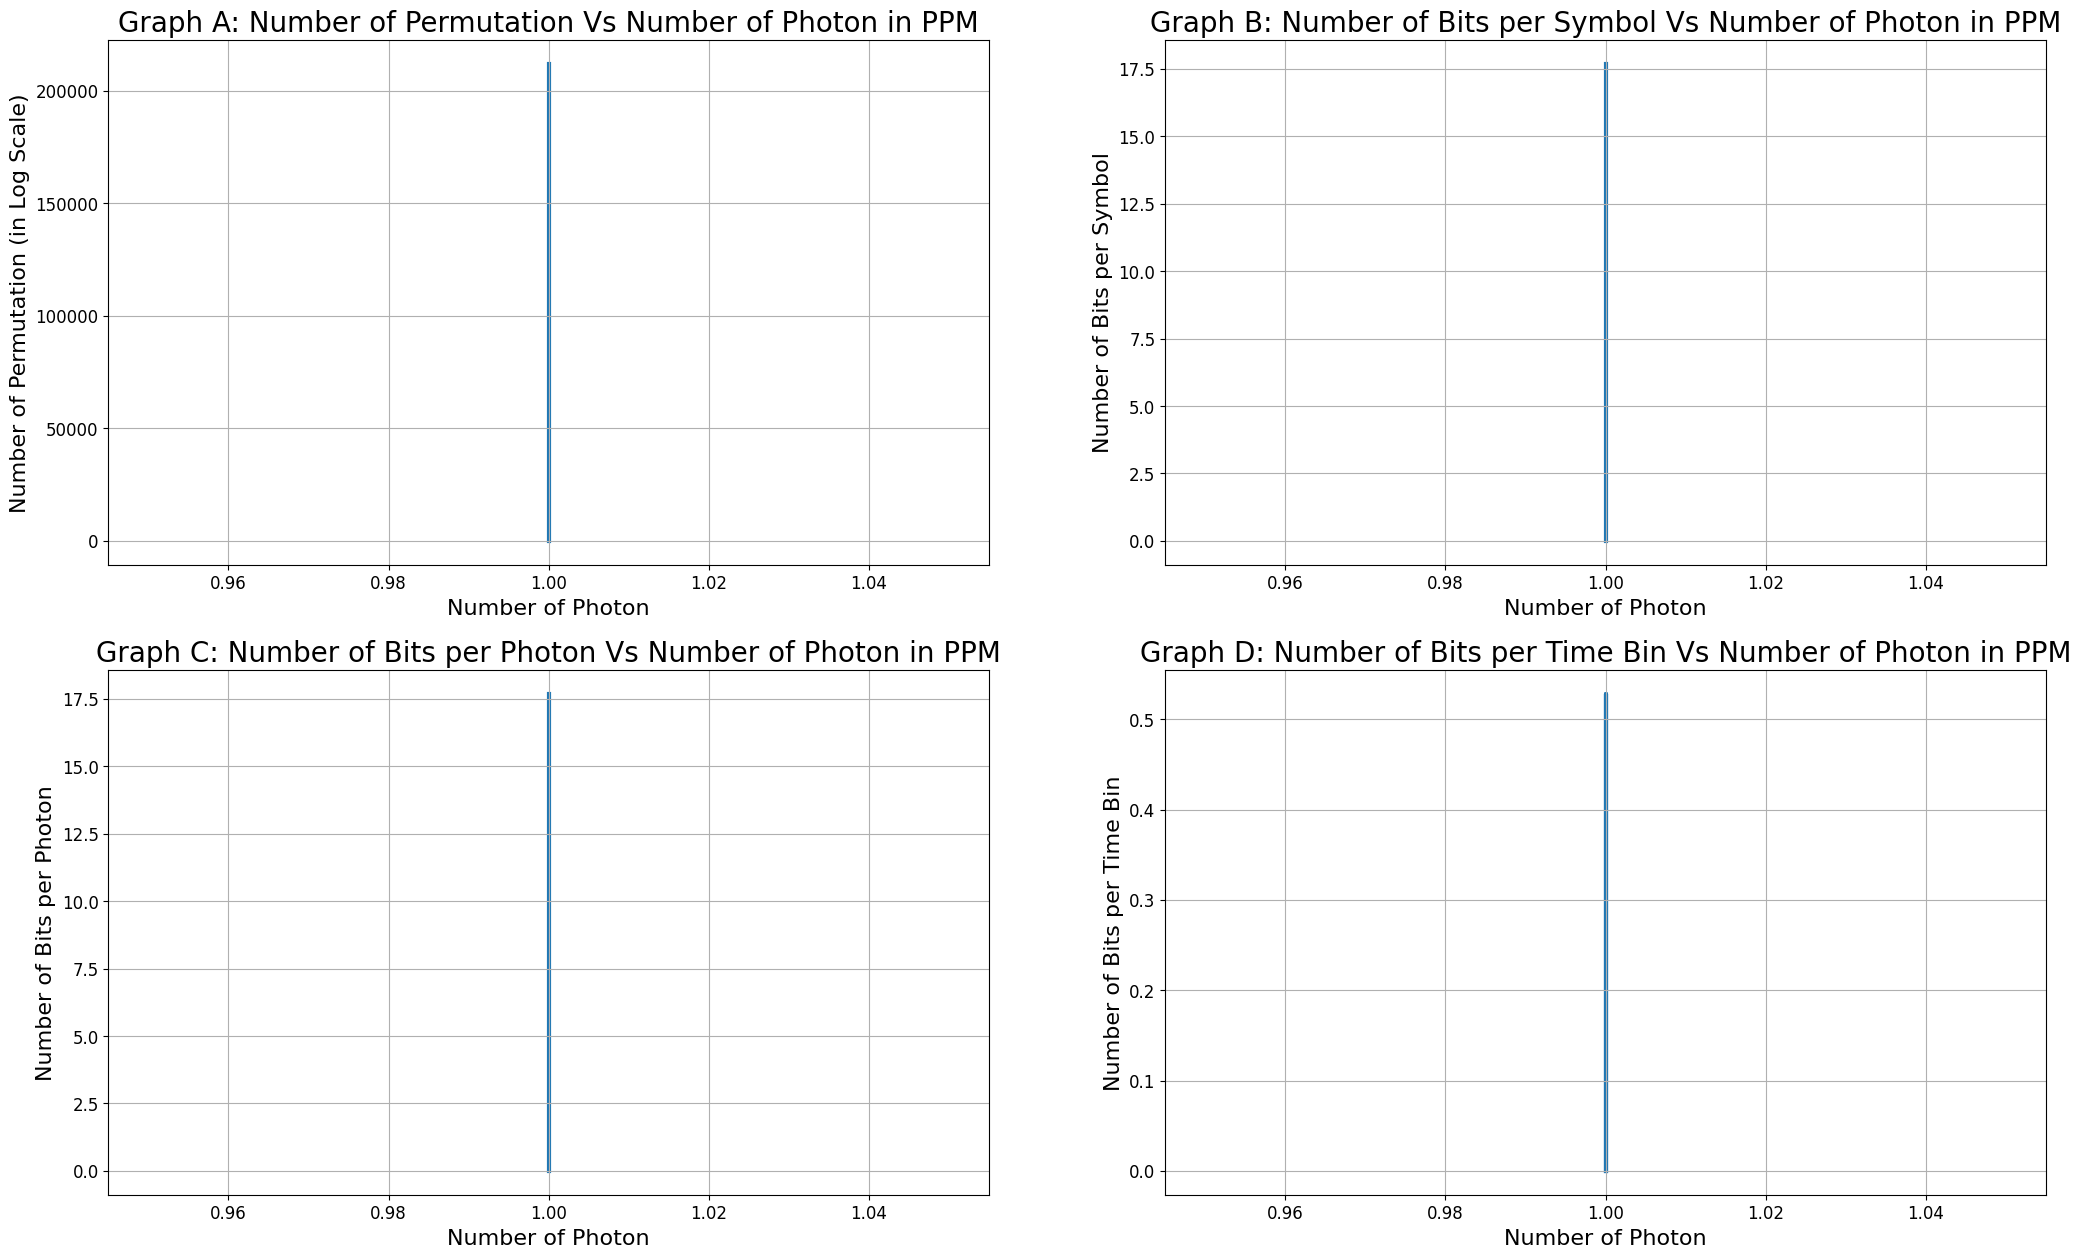

In [28]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Number of Permutation Vs Number of Photon in PPM', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 16)
axis[0, 0].grid(True)

axis[0, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Number of Bits per Symbol Vs Number of Photon in PPM', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Number of Bits per Photon Vs Number of Photon in PPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Number of Bits per Time Bin Vs Number of Photon in PPM', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('PPM/PPM_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


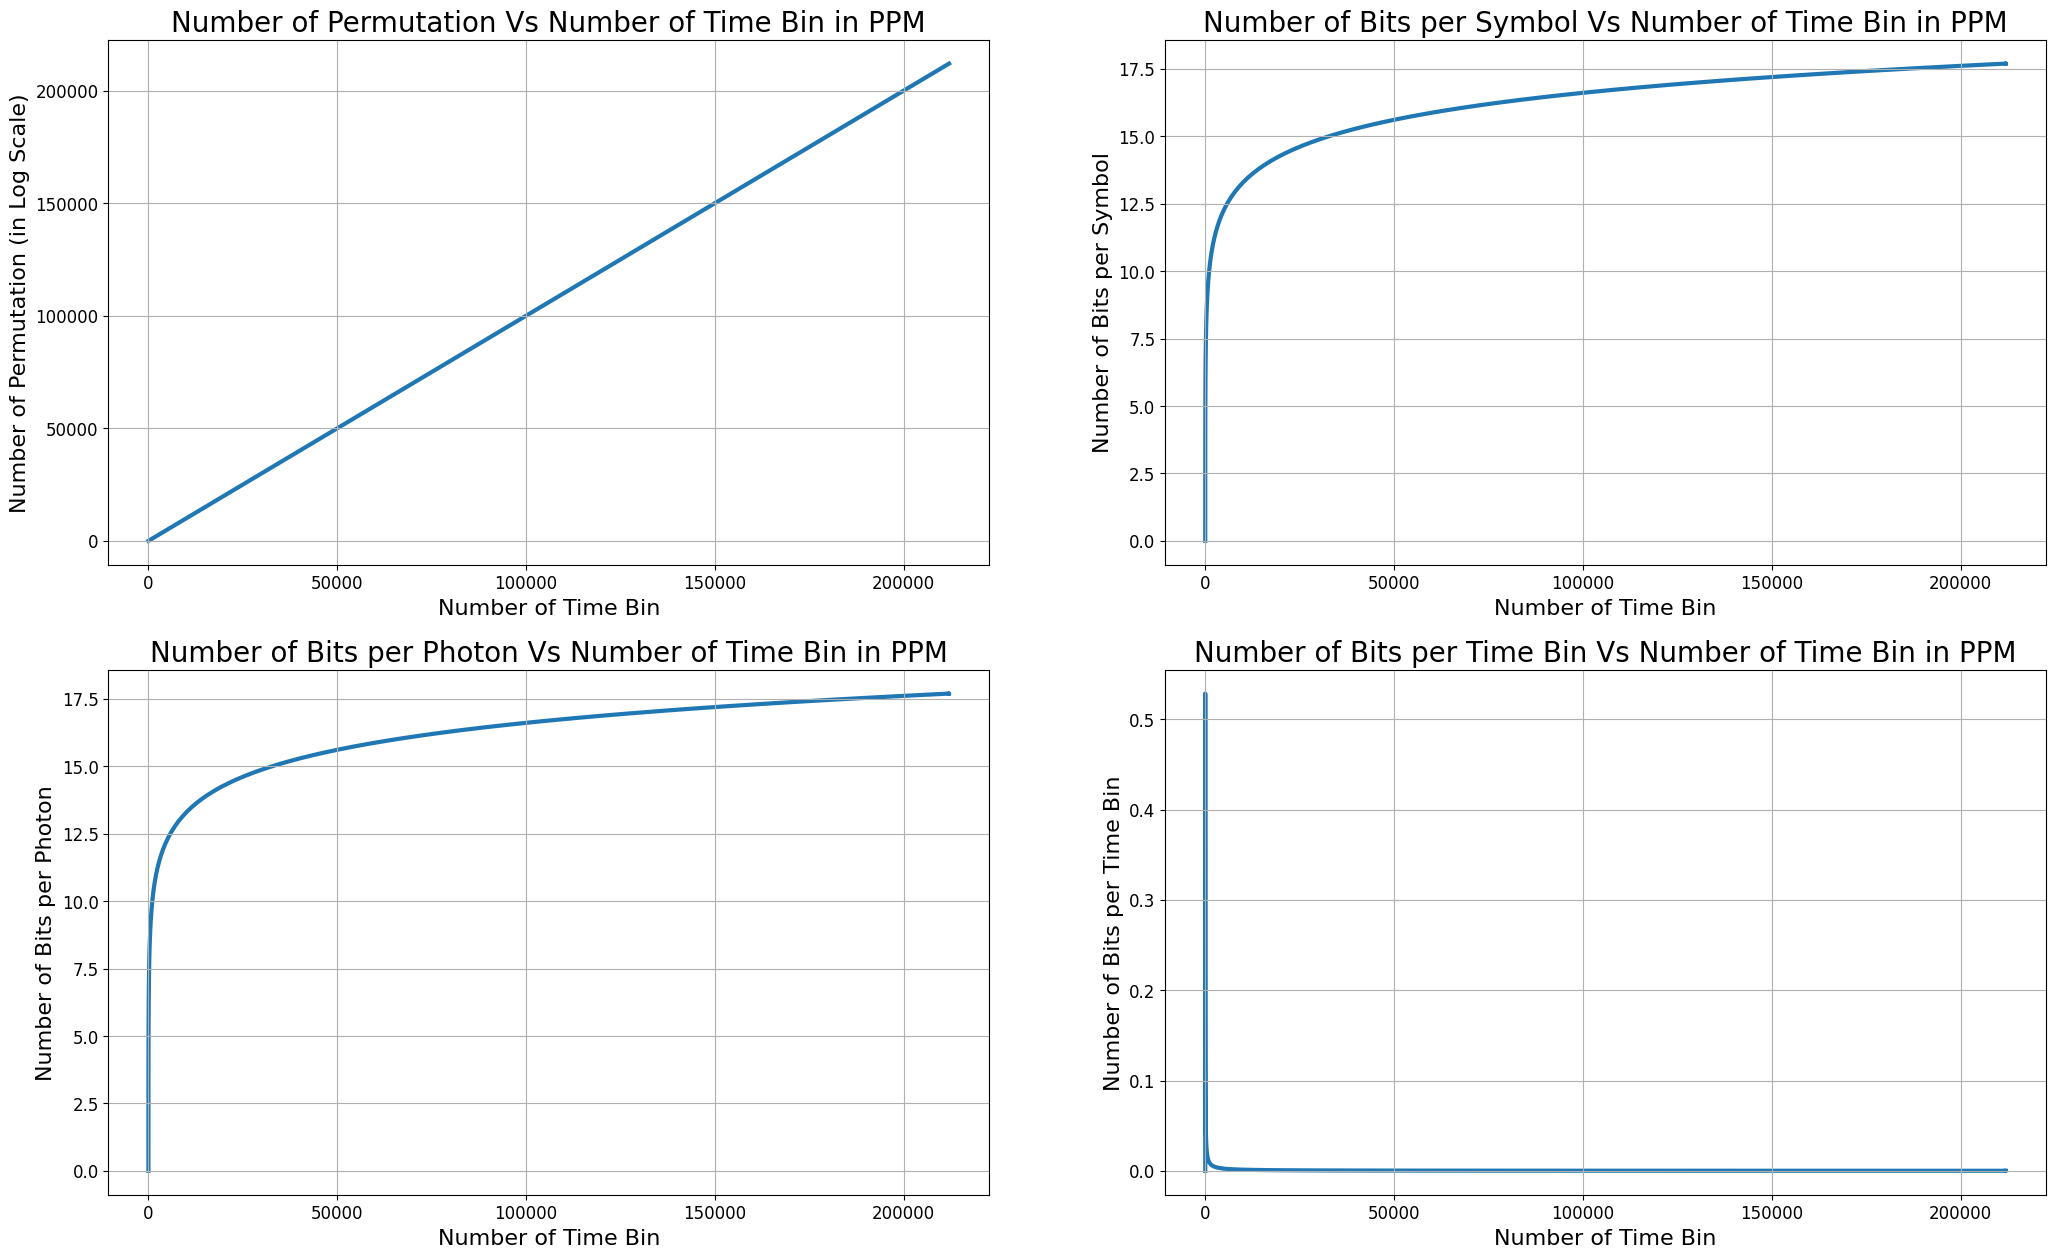

In [29]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation Vs Number of Time Bin in PPM', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 16)
axis[0, 0].grid(True)

axis[0, 1].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Time Bin in PPM', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Time Bin in PPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Bin Vs Number of Time Bin in PPM', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('PPM/PPM_TimeBin_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


# OOK


D1. Compare with OOK method using same number of slots, n. It will in average use k=n/2 photons per symbol \\

D2. The number of symbols m in PPM will be m=2^n \\

D3. The number of bits (the information content per symbol) will be b=log2(m)=n \\

In [30]:
from decimal import Decimal

OOKnumber = []
OOKPermutation = []
OOKBPS = []
OOKBPP = []
OOKBPT = []

# series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002, 1259, 1574, 1947, 2359, 2834, 3364, 3909, 4516, 5232, 6029, 6890, 7854, 8913, 10073, 11379, 12764, 14198]

df_OOK = pd.DataFrame(columns=['Number of Photon', 
                                'Time Bins',
                                'Permutation',  
                                'Bits/Symbol', 
                                'Bits/Photon', 
                                'Bits/Time Bin']
                    )

for n in range(1,60):
    # OOKways = (2)**series[n-1]
    OOKTimeBin = 2 * n                           # D1. Compare with OOK method using same number of slots, n. It will in average use k=n/2 photons per symbol
    OOKWays = (2)**OOKTimeBin
                          # D2. The number of symbols m in PPM will be m=2^n, n is the number of time bin
    OOKbps = math.log2(OOKWays)                        # D3. The number of bits (the information content per symbol) will be b=log2(m)=n, n is the number of time bin
    # OOKbpp = (math.log2(OOKWays) * series[n-1] / n
    OOKbpp = "{:.7g}".format(OOKbps / n)
    OOKbpt = OOKbps / n * n / OOKTimeBin
    # OOKbpt = OOKbps / n * n / series[n-1]
    OOKWays_SigFig = "{:.7g}".format(OOKWays)
    # Jonasways_SigFig = "{:.7g}".format(Jonasways)
    #OOKWays_SigFig = "{:e}".format(float(str(OOKWays)))
    OOKbps_round = "{:.7g}".format(round(OOKbps, 5))
    # OOKbpp_round = round(OOKbpp, 2)
    OOKbpt_round = "{:.7g}".format(round(OOKbpt, 5))

    # OOKTimeBin_SigFig = "{:.2e}".format(OOKTimeBin)

    # df_OOK.loc[len(df_OOK)] = [OOKTimeBin/2, OOKTimeBin, OOKWays, OOKbps_round, OOKbpp_round, OOKbpt_round]
    # df_OOK.loc[len(df_OOK)+1] = [OOKTimeBin/2, OOKTimeBin, OOKWays_SigFig, OOKbps_round, OOKbpp, OOKbpt_round] 
    df_OOK.loc[len(df_OOK)+1] = [OOKTimeBin/2, OOKTimeBin, OOKWays, OOKbps, OOKbpp, OOKbpt]  

In [31]:
df_OOK # not sure if it is correct

,Number of Photon,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
1,1.0,2,4,2.0,2,1.0
2,2.0,4,16,4.0,2,1.0
3,3.0,6,64,6.0,2,1.0
4,4.0,8,256,8.0,2,1.0
5,5.0,10,1024,10.0,2,1.0
6,6.0,12,4096,12.0,2,1.0
7,7.0,14,16384,14.0,2,1.0
8,8.0,16,65536,16.0,2,1.0
9,9.0,18,262144,18.0,2,1.0
10,10.0,20,1048576,20.0,2,1.0


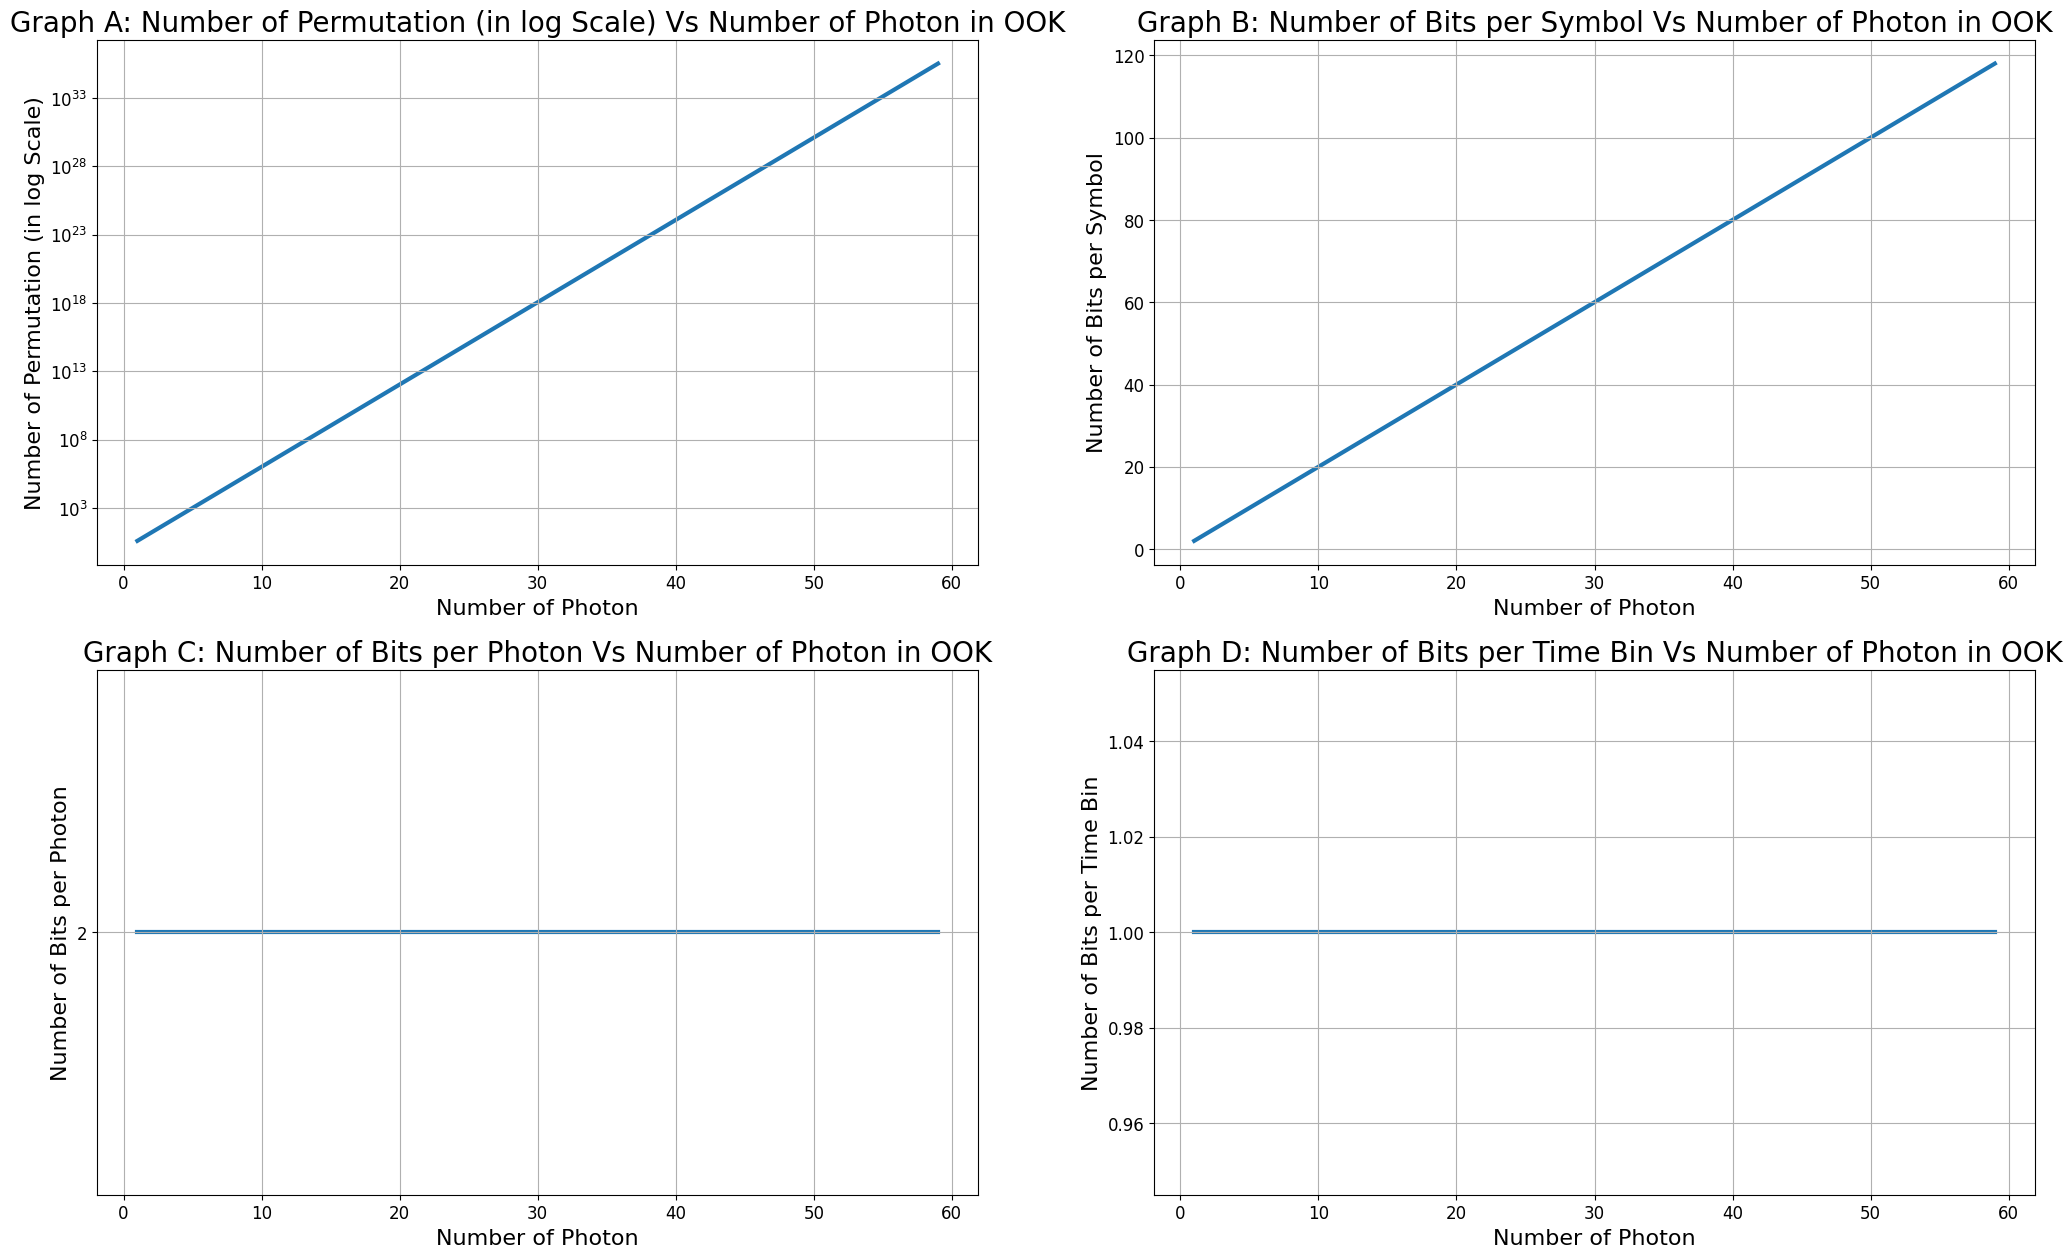

In [32]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")

axis[0, 0].set_title('Graph A: Number of Permutation (in log Scale) Vs Number of Photon in OOK', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Number of Bits per Symbol Vs Number of Photon in OOK', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Number of Bits per Photon Vs Number of Photon in OOK', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Number of Bits per Time Bin Vs Number of Photon in OOK', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('OOK/OOK_Photon_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

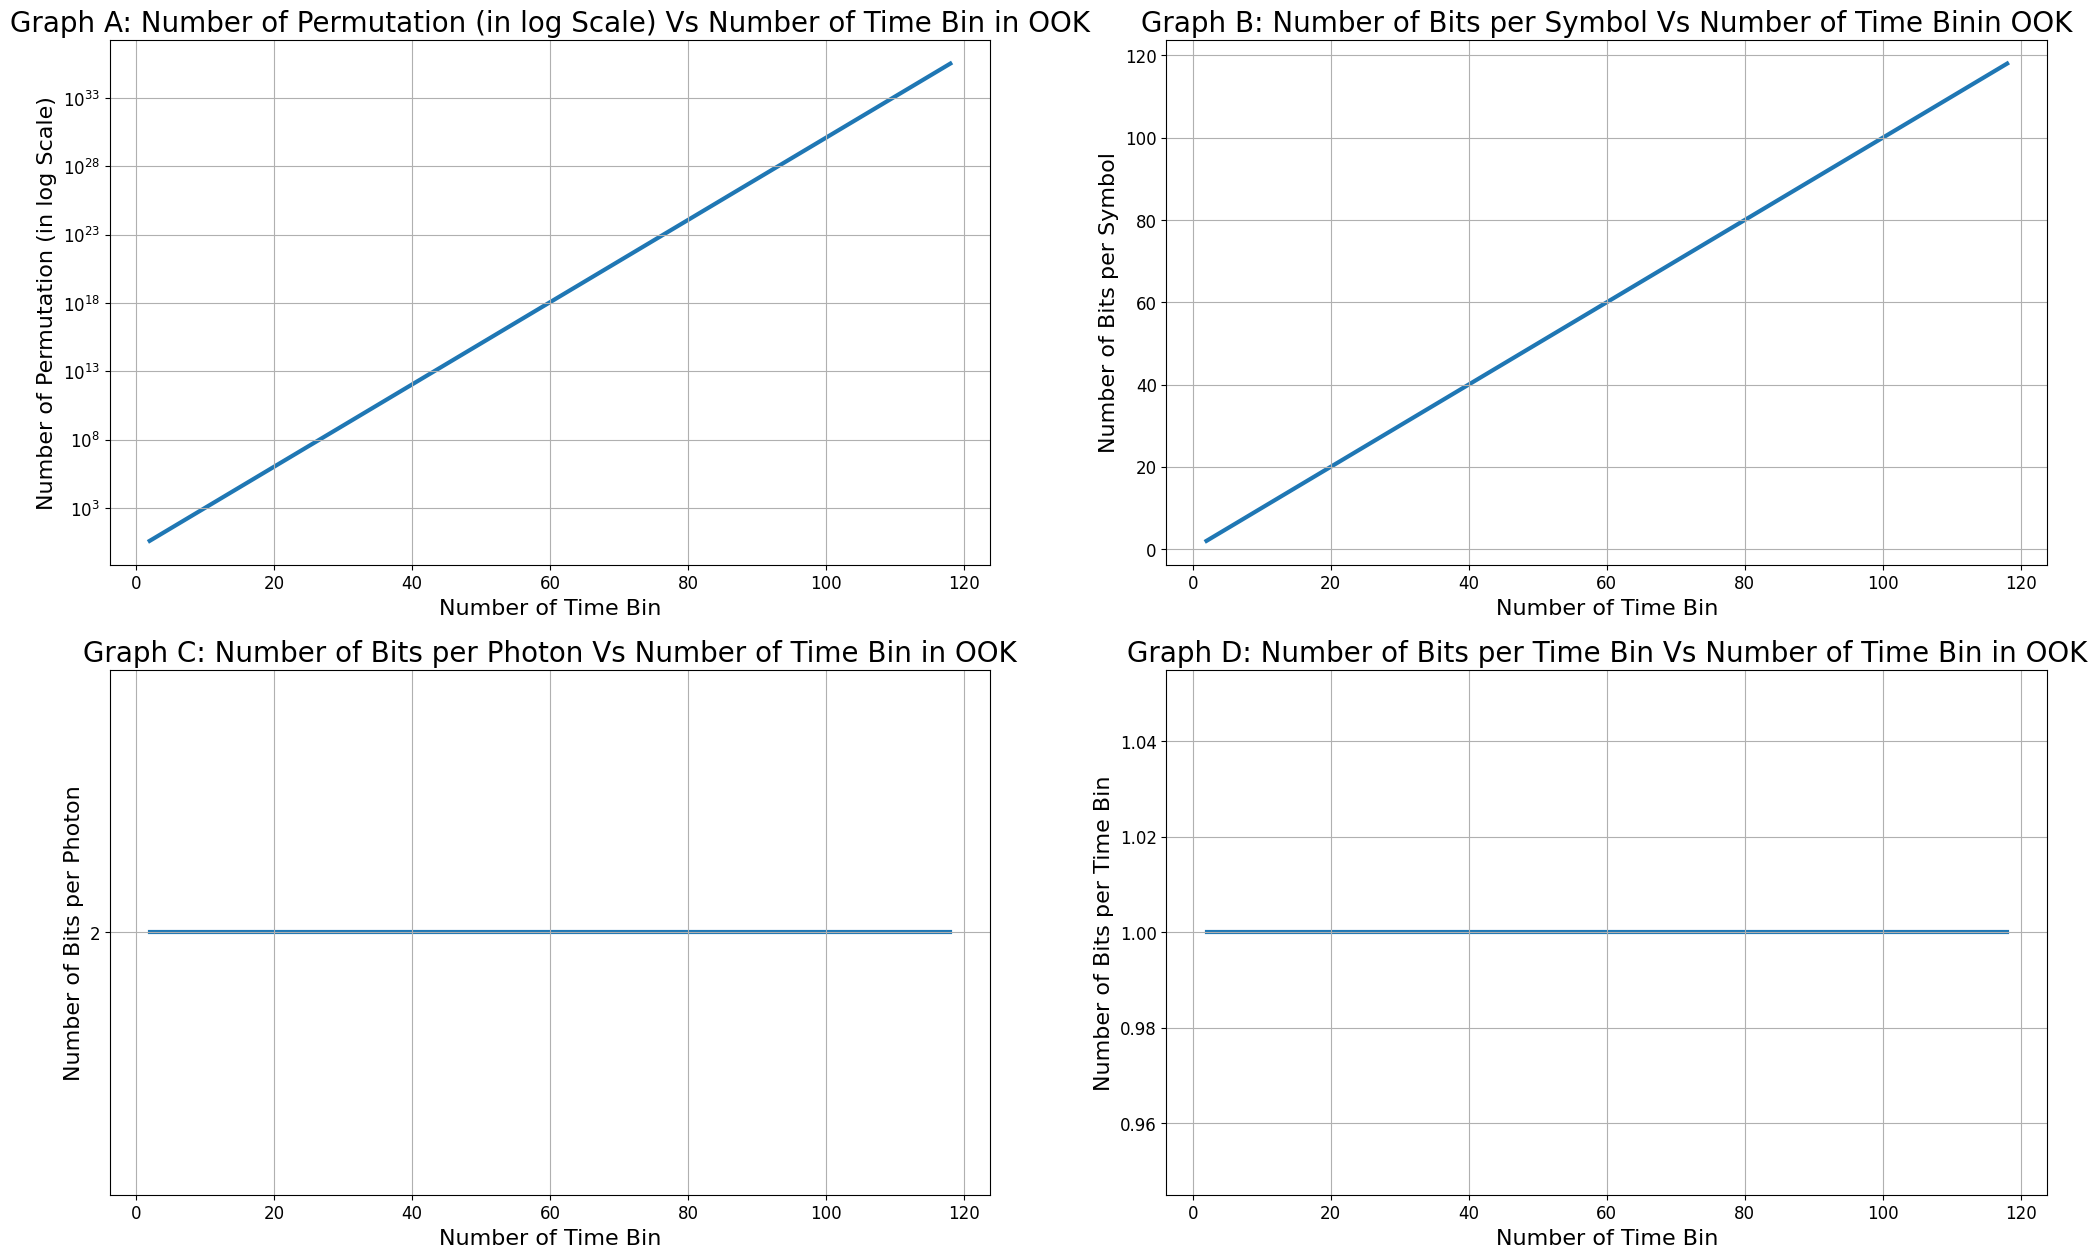

In [33]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")

axis[0, 0].set_title('Graph A: Number of Permutation (in log Scale) Vs Number of Time Bin in OOK', fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Permutation (in log Scale)', fontsize = 16)
axis[0, 0].set_yscale('log')
axis[0, 0].grid(True)

axis[0, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Number of Bits per Symbol Vs Number of Time Binin OOK', fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[4]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Number of Bits per Photon Vs Number of Time Bin in OOK', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Number of Bits per Time Bin Vs Number of Time Bin in OOK', fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('OOK/OOK_TimeBin_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

# Bits/Photon over 4 Schemes

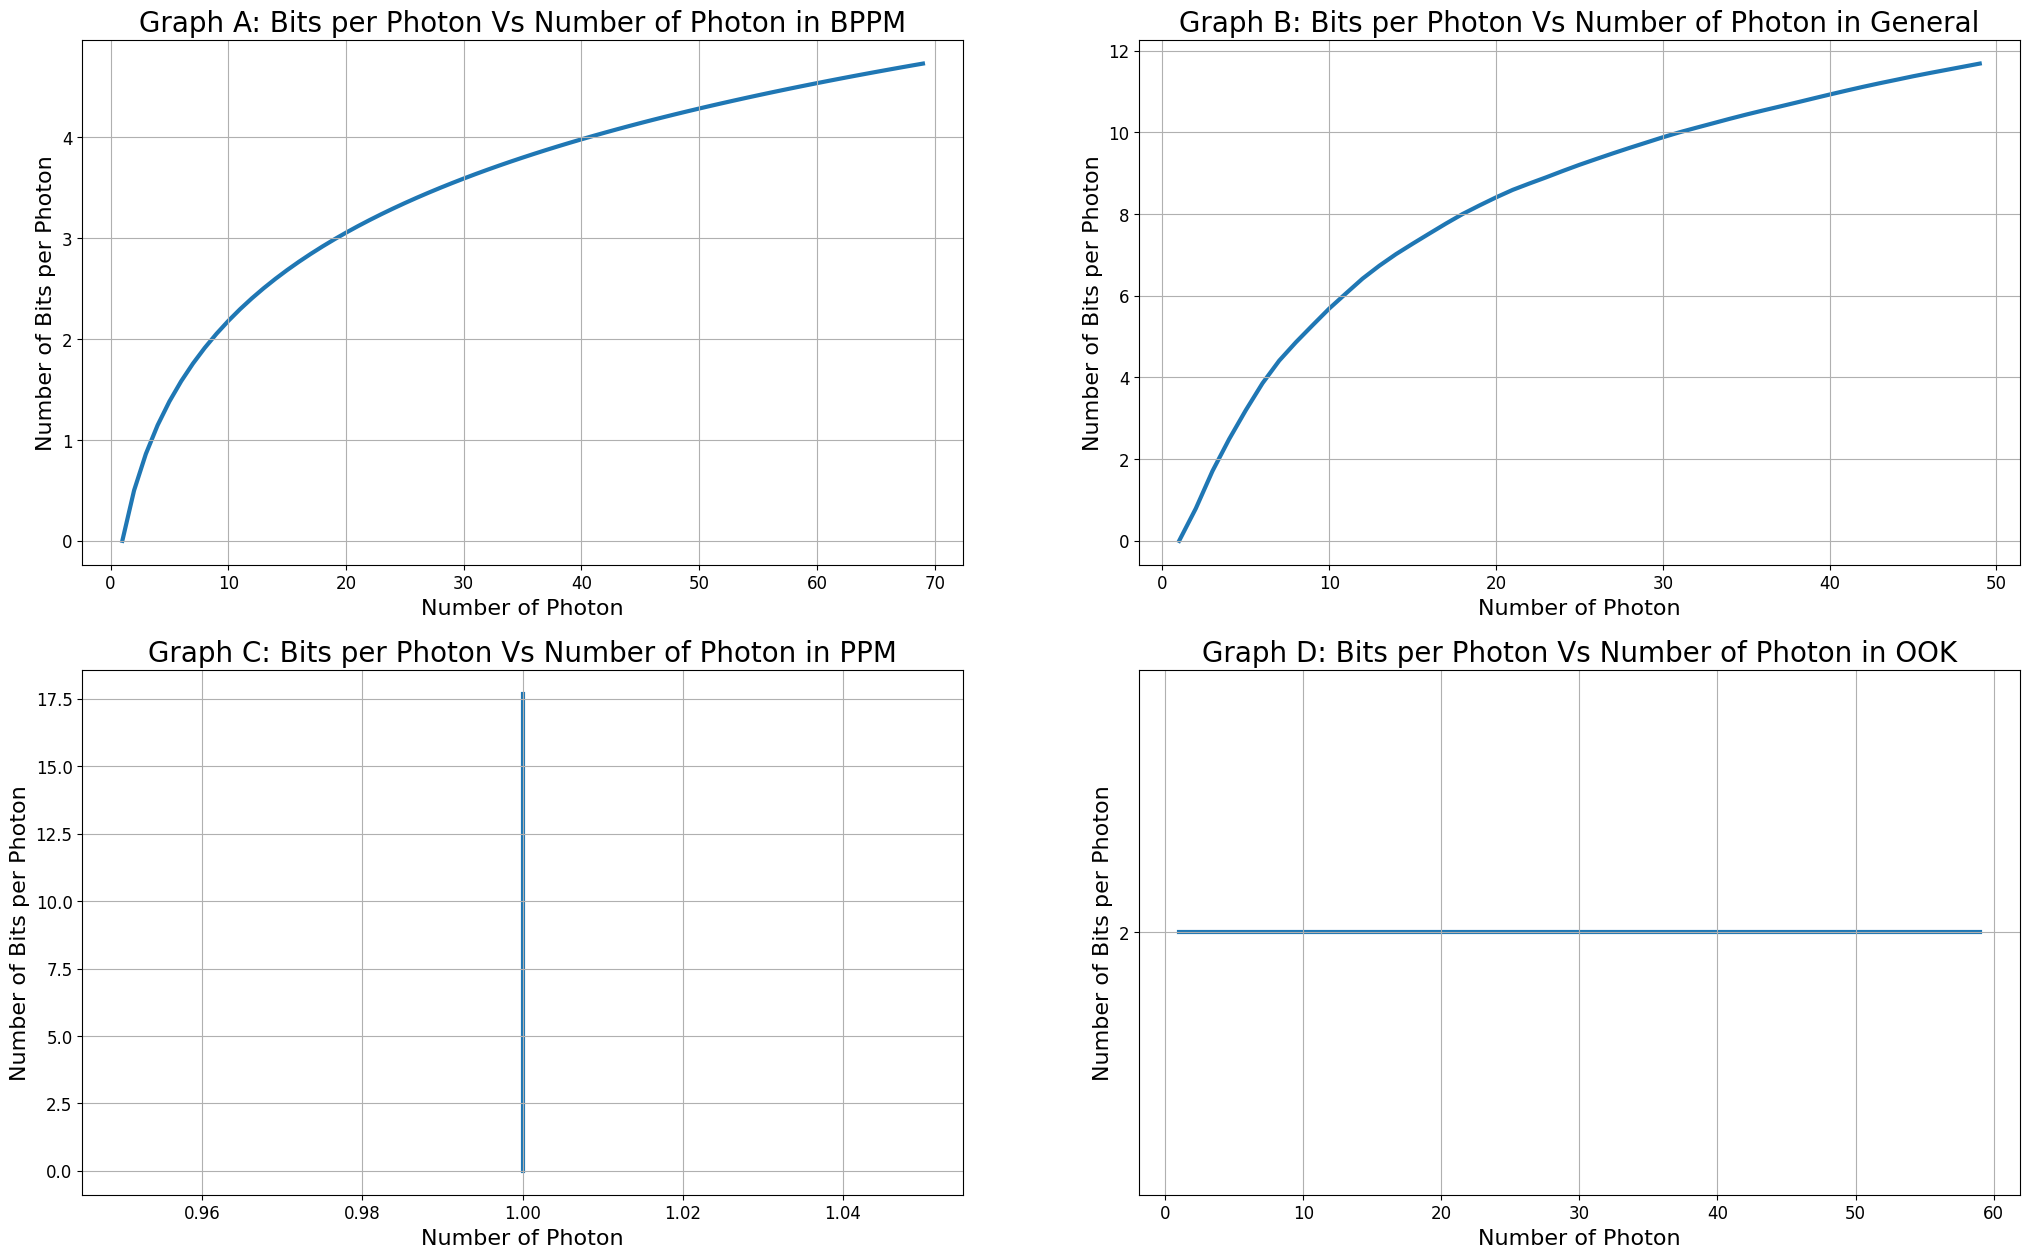

In [34]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Bits per Photon Vs Number of Photon in BPPM' , fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Photon Vs Number of Photon in General' , fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Photon', fontsize = 16)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Photon in PPM' , fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Photon Vs Number of Photon in OOK' , fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Photon', fontsize = 16)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('4Schemes/4SchemesBPP_Photon.png', dpi=450, bbox_inches='tight')
plt.show()

# Bits per Photons Vs Number of TIme Bins

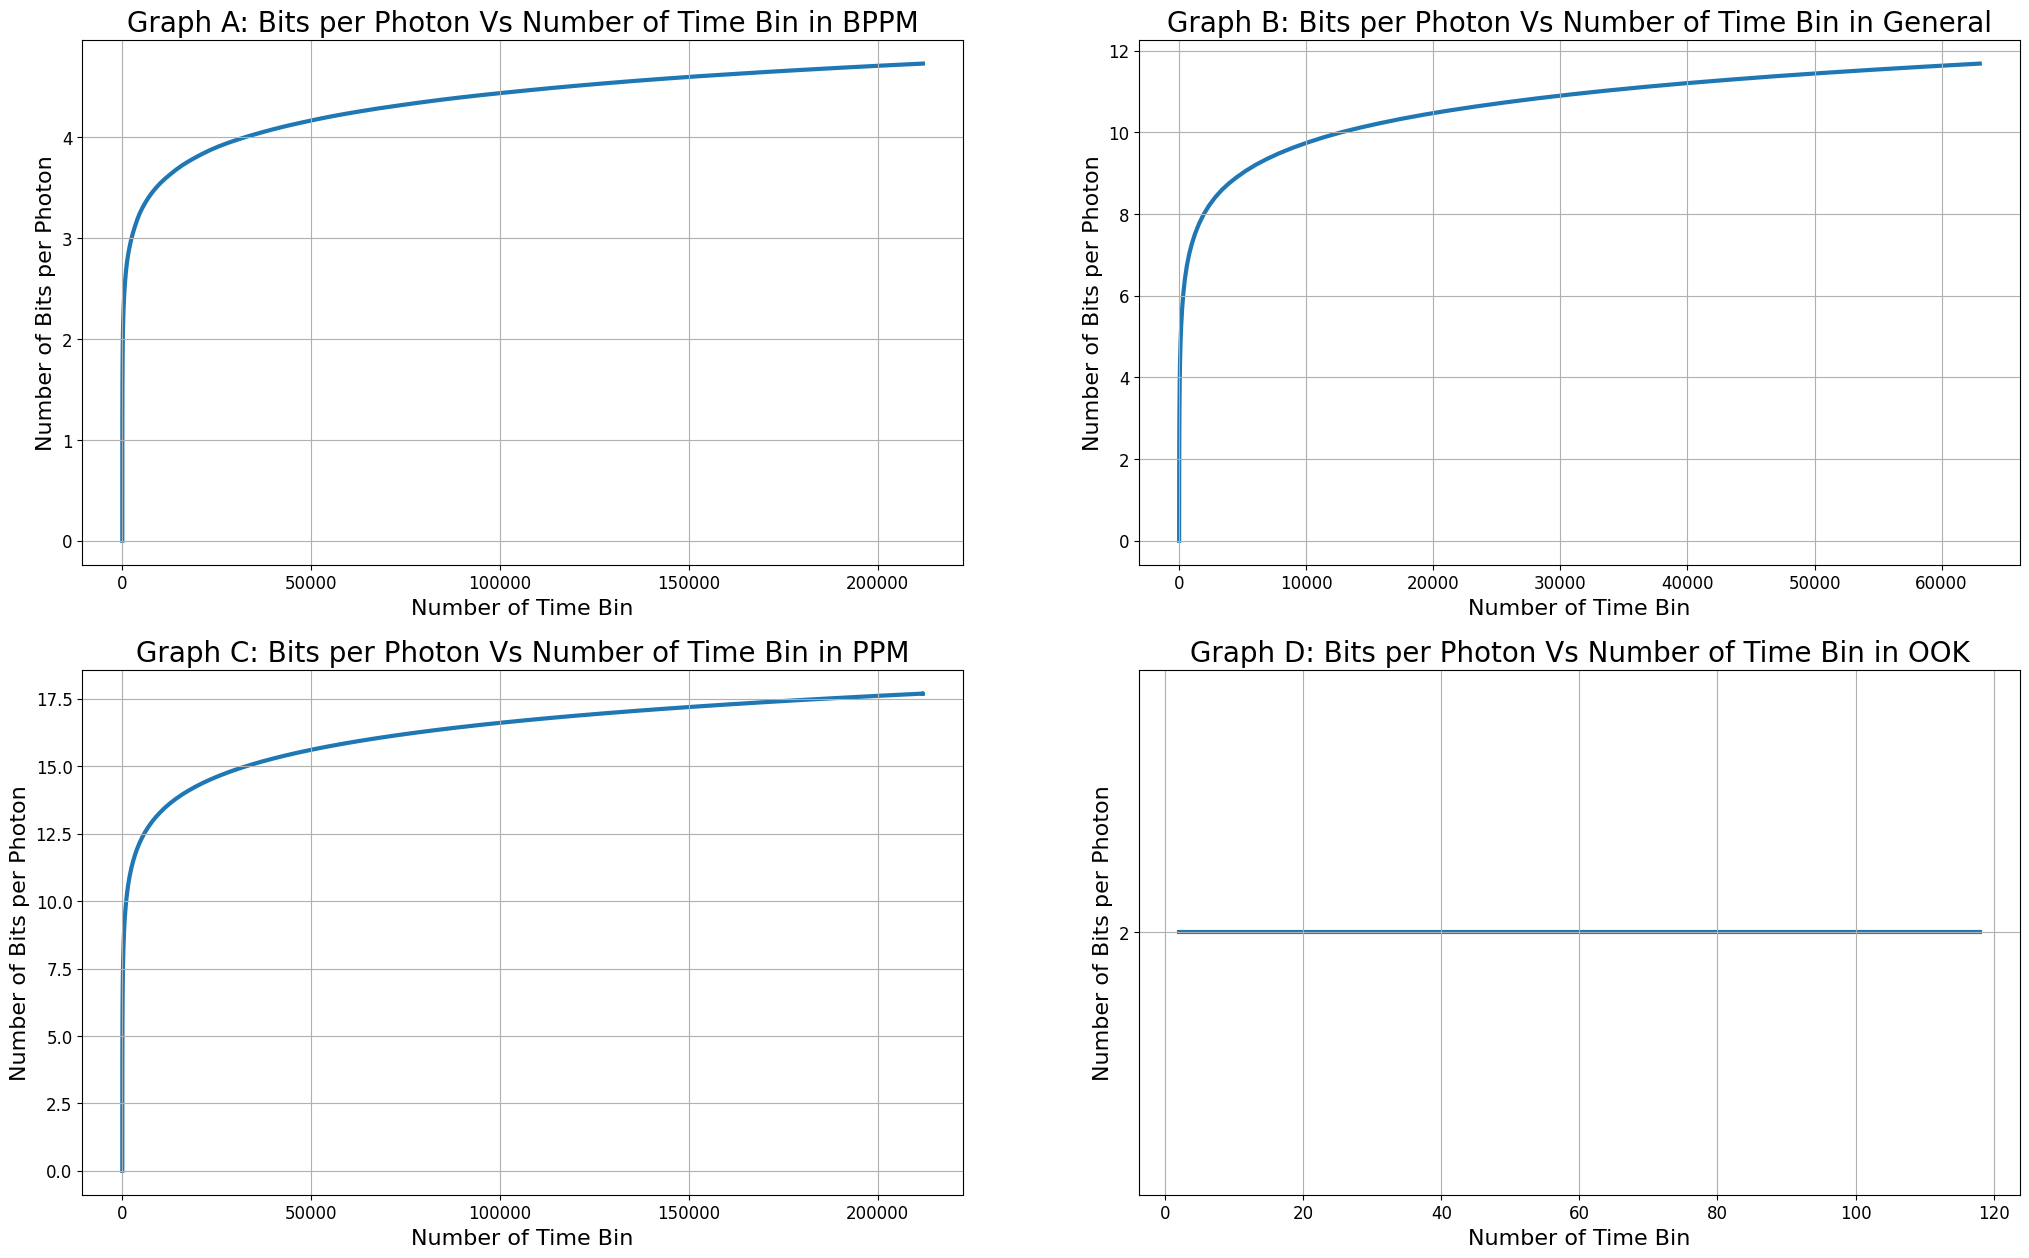

In [35]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Bits per Photon Vs Number of Time Bin in BPPM' , fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Photon Vs Number of Time Bin in General' , fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Photon Vs Number of Time Bin in PPM' , fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Photon Vs Number of Time Bin in OOK' , fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Photon', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('4Schemes/4SchemesBPP_TImeBin.png', dpi=450, bbox_inches='tight')
plt.show()

# Bits/ Time Bin Vs Number of Photon over 4 Schemes

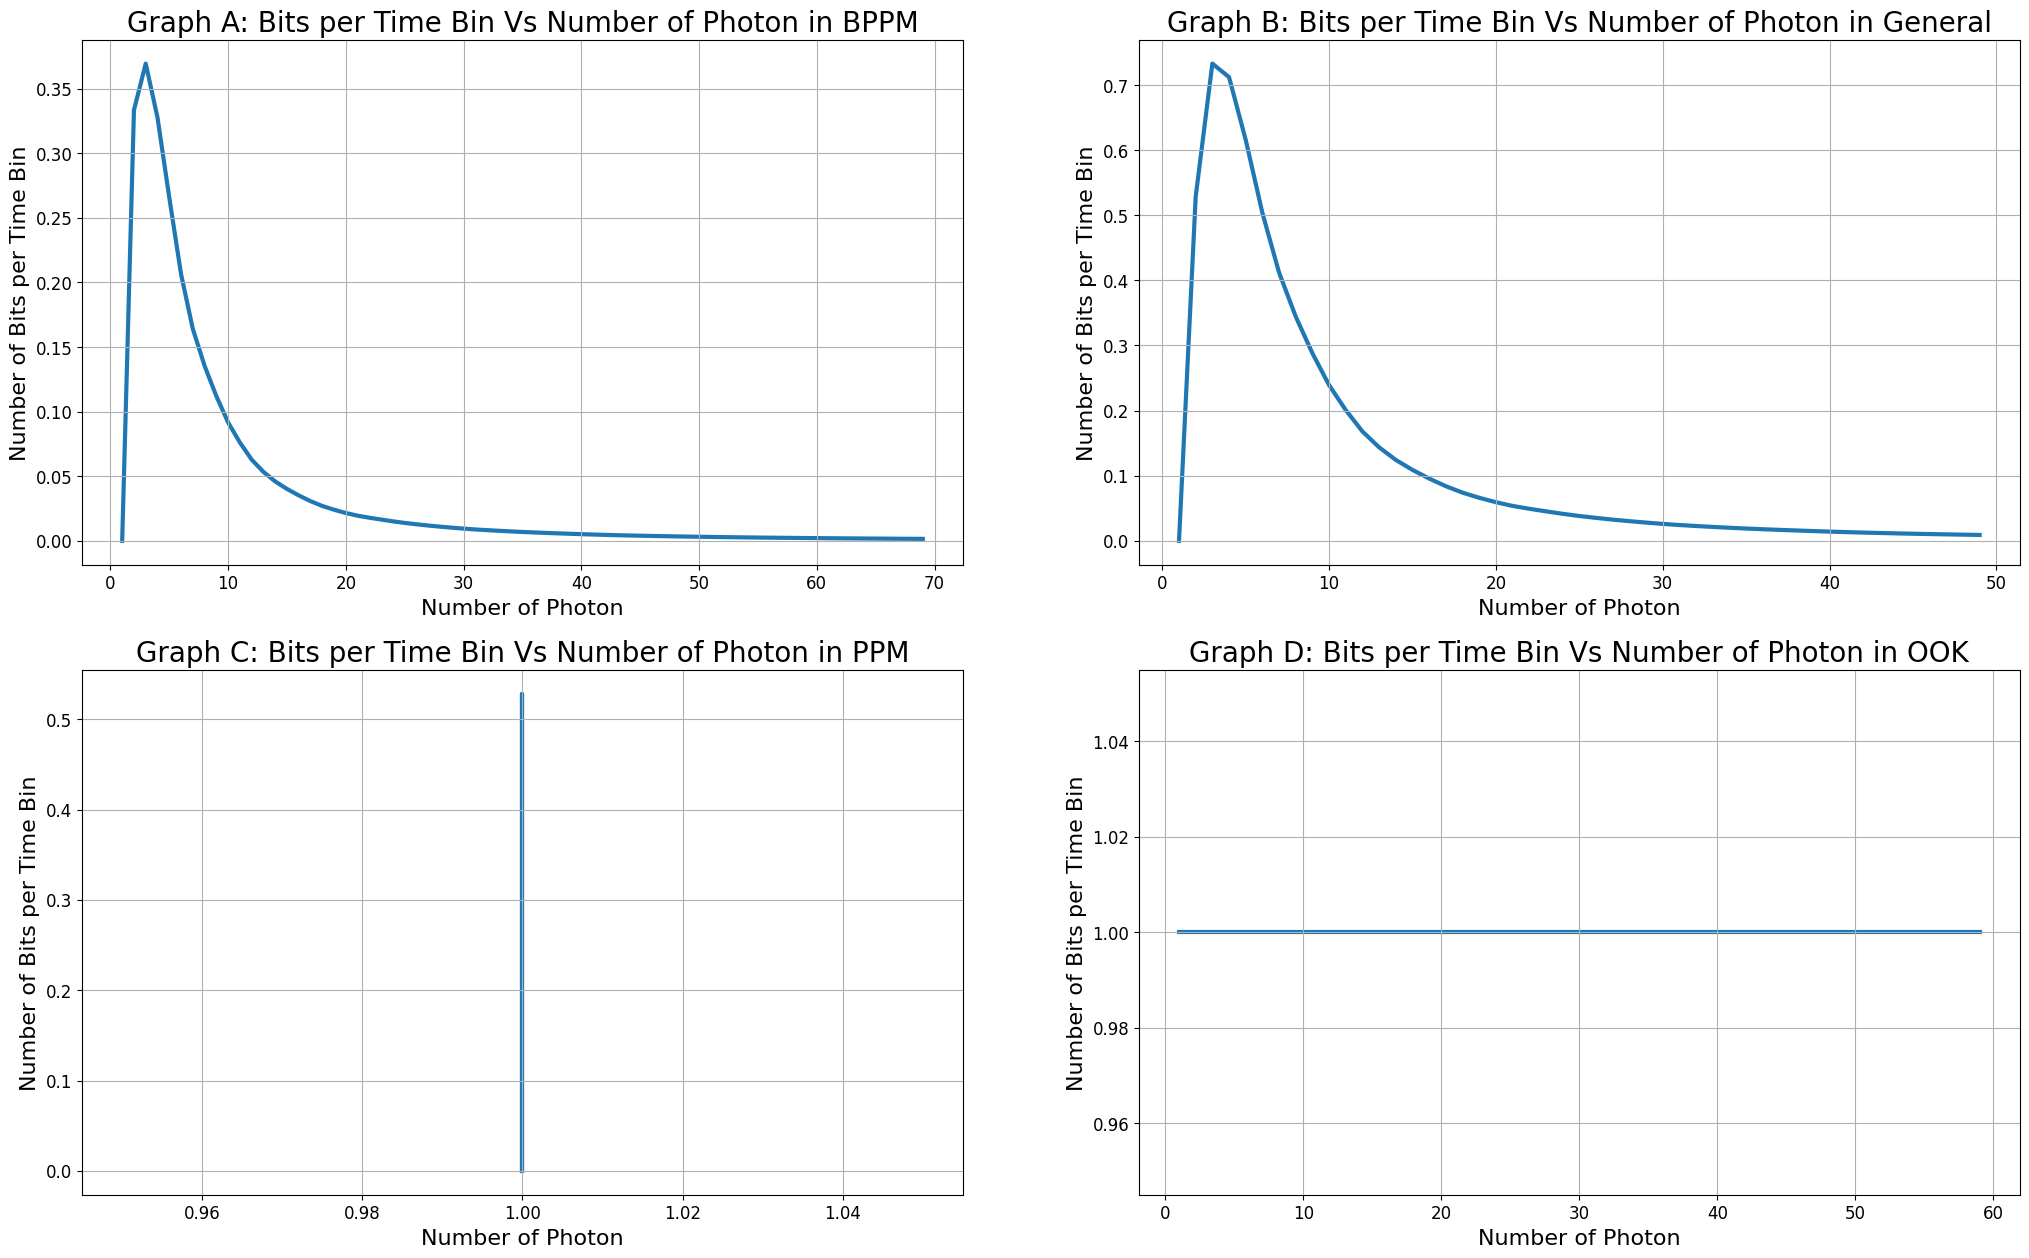

In [36]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Bits per Time Bin Vs Number of Photon in BPPM' , fontsize = 20)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
# axis[0, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Time Bin Vs Number of Photon in General' , fontsize = 20)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
# axis[0, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Time Bin Vs Number of Photon in PPM' , fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
# axis[1, 0].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Photon in OOK' , fontsize = 20)
axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
# axis[1, 1].xaxis.set_major_locator(MultipleLocator(1))  # Set to 1 for integer values
axis[1, 1].grid(True)

figure.set_facecolor("white")
# plt.savefig('4Schemes/4SchemesBPT_Photon.png', dpi=450, bbox_inches='tight')
plt.show()

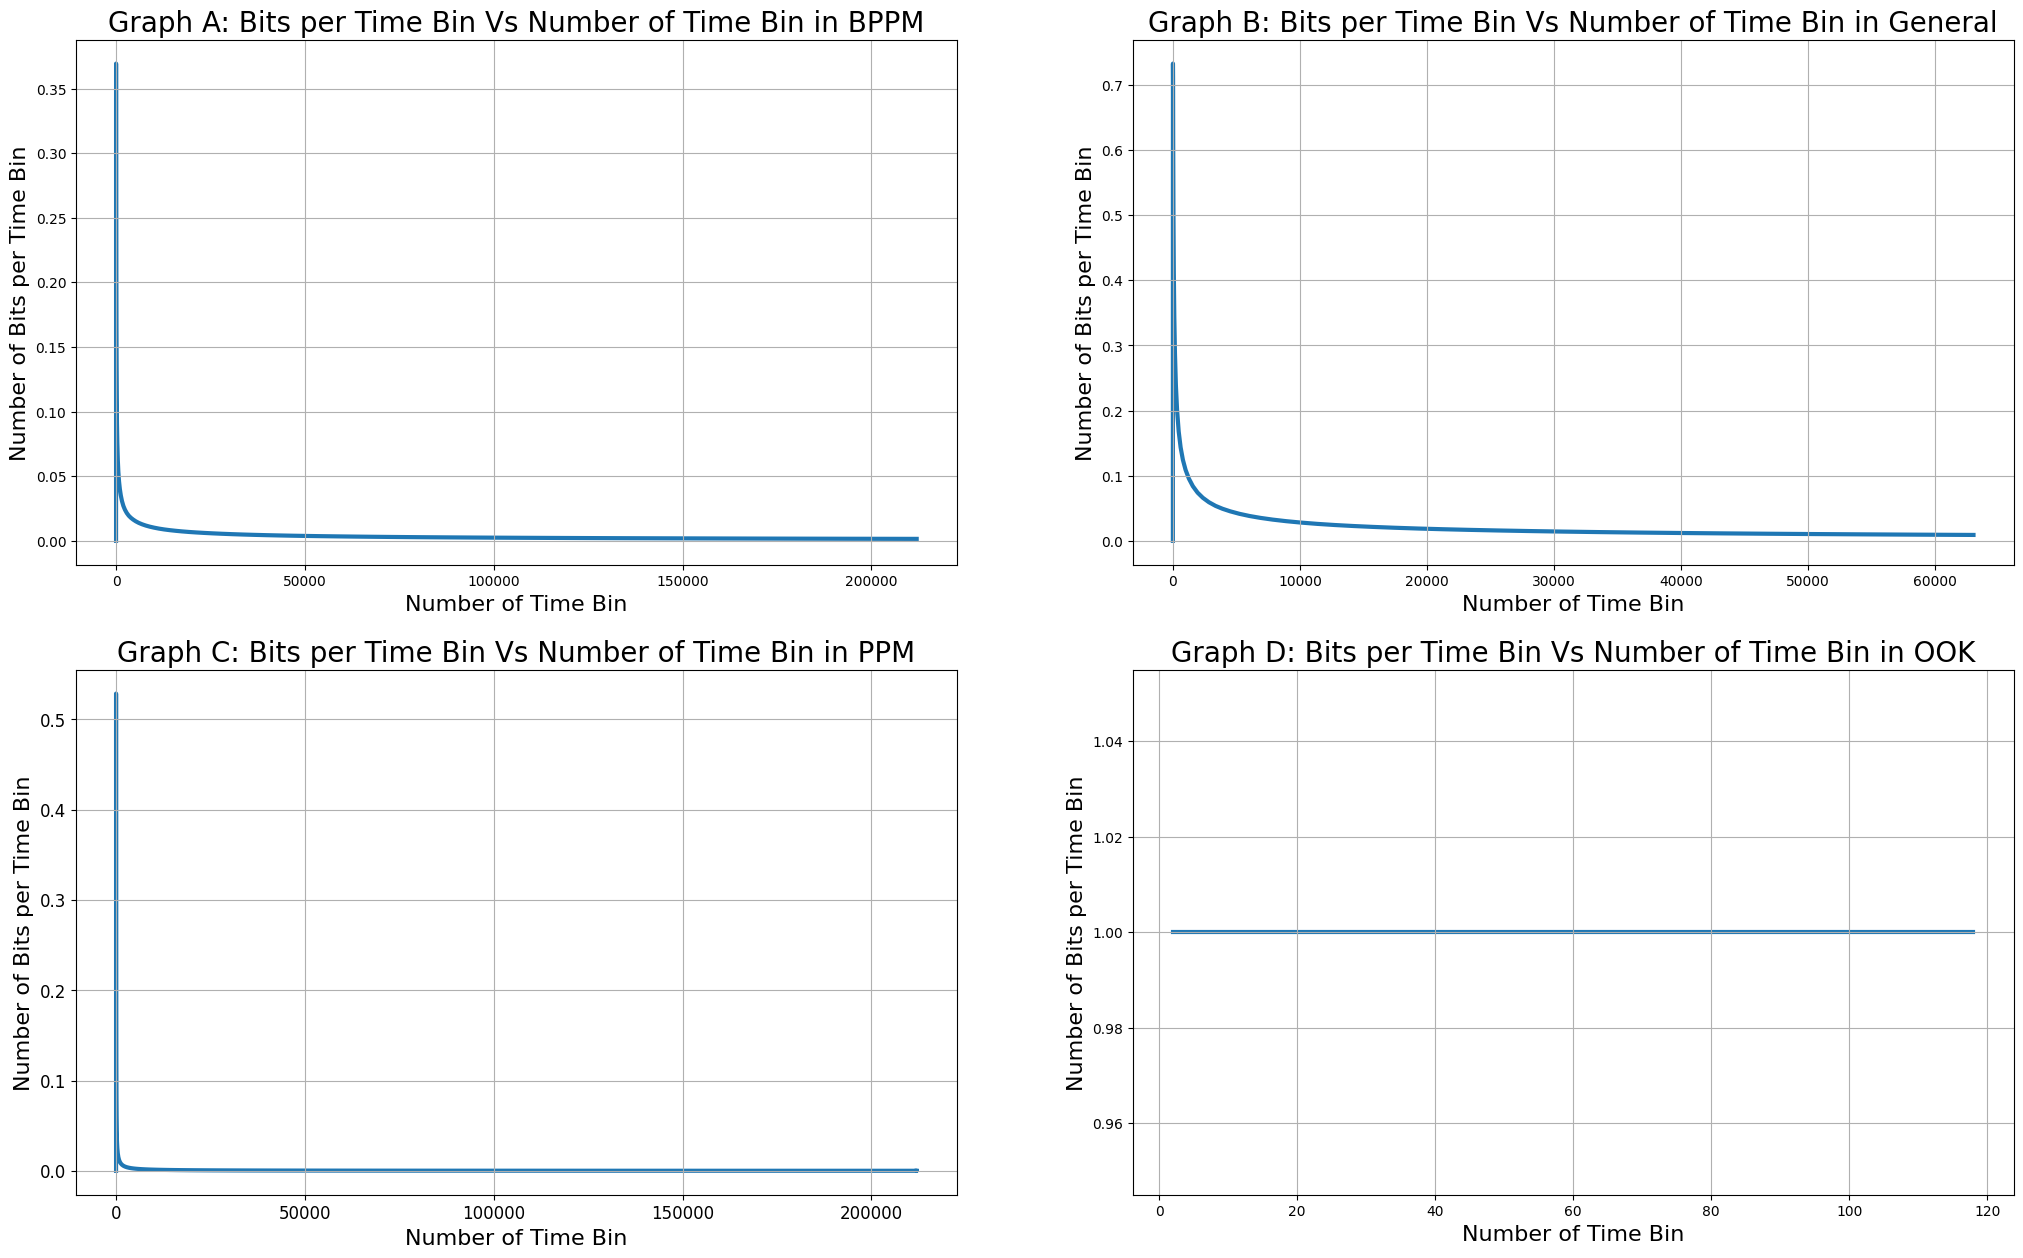

In [37]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[1]],df_Jonas[df_Jonas.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 0].set_title('Graph A: Bits per Time Bin Vs Number of Time Bin in BPPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[0, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[1]],df_General_c[df_General_c.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[0, 1].set_title('Graph B: Bits per Time Bin Vs Number of Time Bin in General', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[0, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[0, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[1]],df_PPM[df_PPM.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 0].set_title('Graph C: Bits per Time Bin Vs Number of Time Bin in PPM', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 0].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[1]],df_OOK[df_OOK.columns[5]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Graph D: Bits per Time Bin Vs Number of Time Bin in OOK', fontsize = 20)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 1].set_xlabel('Number of Time Bin', fontsize = 16)
axis[1, 1].set_ylabel('Number of Bits per Time Bin', fontsize = 16)
axis[1, 1].grid(True)

figure.set_facecolor("white")
#plt.savefig('4Schemes/4schemesBPT_TimeBin.png', dpi=450, bbox_inches='tight')
plt.show()

# Reference

In [38]:
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
# https://towardsdatascience.com/6-pandas-display-options-you-should-memories-84adf8887bc3
# https://dash.plotly.com/datatable/width
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/\
# https://www.adamsmith.haus/python/answers/how-to-print-a-number-in-scientific-notation-in-python
# https://www.scaler.com/topics/python-scientific-notation/
# https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
# https://pythonfix.com/pkg/d/dataframe-image/